# import all necessary Python modules

In [2]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image, display
import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
import itertools
from scipy import signal
import matplotlib as mpl
import umap
import hdbscan
import pingouin as pg
from sklearn.preprocessing import StandardScaler
unique_user_path_notebook = str(np.load('unique_user_path_notebook.npy'))
unique_user_saved_outputs = str(np.load('unique_user_saved_outputs.npy'))
unique_user_path_tracks = str(np.load('unique_user_path_tracks.npy'))
sys.path.append(unique_user_path_notebook+'/cmeAnalysisPostProcessingPythonScripts') # add custom Python scripts to the local path
import display_tracks
import merge_tools
import return_track_attributes
import generate_index_dictionary
import feature_extraction_with_buffer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
possible_track_features = np.load(unique_user_saved_outputs+'/dataframes/possible_track_features.npy')
best_fit_peak_params = np.load(unique_user_saved_outputs+'/dataframes/parameters_best_fit_peak_finding.npy')
index_DNM2positive = np.load(unique_user_saved_outputs+'/dataframes/cluster_dnm2_positive.npy')
index_dictionary = generate_index_dictionary.return_index_dictionary()

# upload 3 color data for ap2/dnm2/arpc3

In [4]:
# upload all 3 channels
all_tracks = [] # a list of all the track objects; each value is one experiment

# this cell is for the following experiment set: 200804_ADA3
tracks_200804ADA3Cell001_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_ADA3/split_channel_data/200804_ADA3_001/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADA3Cell001AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADA3Cell002_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_ADA3/split_channel_data/200804_ADA3_002/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADA3Cell002AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADA3Cell003_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_ADA3/split_channel_data/200804_ADA3_003/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADA3Cell003AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADA3Cell008_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_ADA3/split_channel_data/200804_ADA3_008/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADA3Cell008AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200804ADA3Cell009_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200804_ADA3/split_channel_data/200804_ADA3_009/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200804ADA3Cell009AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')

all_tracks.append(tracks_200804ADA3Cell001_1s)
all_tracks.append(tracks_200804ADA3Cell002_1s)
all_tracks.append(tracks_200804ADA3Cell003_1s)
all_tracks.append(tracks_200804ADA3Cell008_1s)
all_tracks.append(tracks_200804ADA3Cell009_1s)

# this cell is for the following experiment set: 200819_ADA3
tracks_200819ADA3Cell001_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200819_ADA3/split_channel_data/200819_ADA3_001/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200819ADA3Cell001AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200819ADA3Cell002_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200819_ADA3/split_channel_data/200819_ADA3_002/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200819ADA3Cell002AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200819ADA3Cell003_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200819_ADA3/split_channel_data/200819_ADA3_003/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200819ADA3Cell003AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')

all_tracks.append(tracks_200819ADA3Cell001_1s)
all_tracks.append(tracks_200819ADA3Cell002_1s)
all_tracks.append(tracks_200819ADA3Cell003_1s)

# # using previous imaging data (7/22) that did not have AP2/DNM2 cell line imaged at the same time

tracks_200722ADCell001_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200722_ADA3/split_channel_data/200722_ADA3_001/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200722ADA3Cell001AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200722ADCell002_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200722_ADA3/split_channel_data/200722_ADA3_002/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200722ADA3Cell002AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200722ADCell003_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200722_ADA3/split_channel_data/200722_ADA3_003/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200722ADA3Cell003AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200722ADCell004_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200722_ADA3/split_channel_data/200722_ADA3_004/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200722ADA3Cell004AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')
tracks_200722ADCell005_1s=display_tracks.load_tracks(unique_user_path_tracks + '/ap2dynm2arcp3_project/TIRF movies revised/tracking_data_test_cyna/200722_ADA3/split_channel_data/200722_ADA3_005/tracking_settings_gaussian_psf_model_trackinggaplength_2_trackingradius_3_6/200722ADA3Cell005AP2DNMN2ARPC3_1s/Ch1/Tracking/ProcessedTracks.mat')

all_tracks.append(tracks_200722ADCell001_1s)
all_tracks.append(tracks_200722ADCell002_1s)
all_tracks.append(tracks_200722ADCell003_1s)
all_tracks.append(tracks_200722ADCell004_1s)
all_tracks.append(tracks_200722ADCell005_1s)

In [5]:
valid_tracks_separate_experiments_3_color = [display_tracks.remove_tracks_by_criteria(track_set, track_category=[1]) for track_set in all_tracks]

The number of tracks returned: 6246

The number of tracks returned: 7601

The number of tracks returned: 8386

The number of tracks returned: 7435

The number of tracks returned: 7712

The number of tracks returned: 7898

The number of tracks returned: 6650

The number of tracks returned: 6620

The number of tracks returned: 7647

The number of tracks returned: 7693

The number of tracks returned: 7411

The number of tracks returned: 7348

The number of tracks returned: 6256



In [7]:
merged_all_valid_tracks = merge_tools.merge_experiments(valid_tracks_separate_experiments_3_color,[list(range(len(track_set))) for track_set in valid_tracks_separate_experiments_3_color])

# save all valid tracks, split to allow for <100 mb permitted size

In [8]:
# save each track array chunk
for i in range(len(valid_tracks_separate_experiments_3_color)):

    np.save(unique_user_saved_outputs+"/dataframes/merged_all_valid_tracks_3colorsimultaneoustrackingarpc3"+str(i), np.array(list(valid_tracks_separate_experiments_3_color[i])))

# load all valid tracks

In [4]:
# load all valid tracks
merged_all_valid_tracks = np.load(unique_user_saved_outputs+'/dataframes/merged_all_valid_tracks_3colorsimultaneoustrackingarpc30.npy', allow_pickle=True)
valid_tracks_separate_experiments_3_color = []
valid_tracks_separate_experiments_3_color.append(merged_all_valid_tracks)

for i in range(1,13):

    merged_all_valid_tracks = np.concatenate((merged_all_valid_tracks,
                                             np.load(unique_user_saved_outputs+'/dataframes/merged_all_valid_tracks_3colorsimultaneoustrackingarpc3'+str(i)+'.npy', allow_pickle=True)))
    valid_tracks_separate_experiments_3_color.append(np.load(unique_user_saved_outputs+'/dataframes/merged_all_valid_tracks_3colorsimultaneoustrackingarpc3'+str(i)+'.npy', allow_pickle=True))

In [5]:
experiment_number = [i for i in range(len(valid_tracks_separate_experiments_3_color)) for _ in range(len(valid_tracks_separate_experiments_3_color[i]))]

# extract features and find DNM2+ and events_kept

In [6]:
possible_track_features

array(['lifetime', 'max_int_ch0', 'max_int_ch1', 'dist_traveled_ch0',
       'dist_traveled_ch1', 'max_dist_between_ch0_ch1', 'md_ch0',
       'md_ch1', 'time_to_peak_ch0', 'time_to_peak_ch1',
       'time_after_peak_ch0', 'time_after_peak_ch1',
       'time_between_peaks_ch0_ch1', 'avg_int_change_to_peak_ch0',
       'avg_int_change_to_peak_ch1', 'avg_int_change_after_peak_ch0',
       'avg_int_change_after_peak_ch1', 'peak_int_diff_ch0_ch1',
       'ratio_max_int_ch0_ch1', 'mean_ch0', 'mean_ch1', 'variation_ch0',
       'variation_ch1', 'skewness_ch0', 'skewness_ch1', 'kurtosis_ch0',
       'kurtosis_ch1', 'number_significant_ch1',
       'max_consecutive_significant_ch1', 'fraction_significant_ch1',
       'fraction_peak_ch0', 'fraction_peak_ch1'], dtype='<U31')

In [7]:
all_track_features_3_color = feature_extraction_with_buffer.TrackFeatures(merged_all_valid_tracks) # an instance of a to-be feature matrix of tracks
all_track_features_3_color.add_features(possible_track_features) # set the features to be extracted
all_track_features_3_color.extract_features() # extract all features
extracted_features_all_tracks_3_color = all_track_features_3_color.feature_matrix # feature matrix for all tracks

In [8]:
df_merged_features_simultaneous3colortrackingarpc3 = pd.DataFrame(data=extracted_features_all_tracks_3_color, columns=possible_track_features)

In [9]:
# save the dataframe for subsequent notebooks
compression_opts = dict(method='zip',
                        archive_name=unique_user_saved_outputs+'/dataframes/df_merged_features_simultaneous3colortrackingarpc3.csv')  

df_merged_features_simultaneous3colortrackingarpc3.to_csv(unique_user_saved_outputs+'/dataframes/df_merged_features_simultaneous3colortrackingarpc3.zip', index=False,
                                                          compression=compression_opts) 

In [10]:
with open(unique_user_saved_outputs+'/dataframes/normal_scaler_model', 'rb') as f:
    scaler = pickle.load(f)

with open(unique_user_saved_outputs+'/dataframes/pca_model_fit', 'rb') as f:
    pca_model = pickle.load(f)

with open(unique_user_saved_outputs+'/dataframes/gmm_trained', 'rb') as f:
    gmm_model = pickle.load(f)

In [11]:
scaled_features_new_data = scaler.transform(extracted_features_all_tracks_3_color[:,:len(possible_track_features)]) # scale features to normal distribution, taking into account all previously scaled data
pcs_new_data = pca_model.transform(scaled_features_new_data) # find projections of newly scaled data on previous PC axes
gmm_predictions_new_data = gmm_model.predict(pcs_new_data) # find gmm cluster assignments using previously fit model

In [12]:
# get DNM2 positive events
dnm2_pos_indices = np.where(gmm_predictions_new_data==index_DNM2positive)[0]
dnm2_positive_events = np.array(list(merged_all_valid_tracks))[dnm2_pos_indices]

In [13]:
all_dnm2_signal = []

for i in range(len(dnm2_positive_events)): # stack all DNM2 intensities

    raw_dnm2_intensity = list(return_track_attributes.return_track_amplitude_no_buffer_channel(dnm2_positive_events,i,1))

    all_dnm2_signal.append(raw_dnm2_intensity)

In [14]:
sos = signal.butter(4, 0.2, 'lp', fs=1, output='sos') # low-pass 4-th order Butterworth filter

filtered_amplitudes = [] # filtered DNM2 traces per track of interest

for i in range(len(all_dnm2_signal)):

    raw_intensity = all_dnm2_signal[i]
    # add zeros to end to account for phase shift of near-track-end peaks
    filtered_amplitudes.append(list(list(signal.sosfilt(sos, raw_intensity)) + [0, 0, 0, 0, 0])) 
    
current_param_outputs = [] # one-hot encoding of indices of tracks with a single peak (0: multiple peaks)


for i in range(len(filtered_amplitudes)): # iterate through all filtered amplitudes
    
    pvals_dnm2 = return_track_attributes.return_pvals_detection_no_buffer(dnm2_positive_events, i, 1)
    
    # measure whether there is 1 peak with the specified peak-finding parameters
    if len(signal.find_peaks(filtered_amplitudes[i], 
                             distance=best_fit_peak_params[0], 
                             height=best_fit_peak_params[1],
                             width=best_fit_peak_params[2])[0])==1 and len(np.where(np.array(pvals_dnm2)<0.01)[0])>0:

        current_param_outputs.append(1)

    else:

        current_param_outputs.append(0)

In [15]:
ccp_indices = np.where(np.array(current_param_outputs)==1)[0]
ccps = dnm2_positive_events[ccp_indices]

In [16]:
events_kept = ccps

# extract 3rd channel (ARPC3) features

In [202]:
lifetime = []
max_arpc3_intensity = []
max_dnm2_intensity = []
max_ap2_intensity = []
number_significant_arpc3 = []
max_consecutive_significant_arpc3 = []
fraction_significant_arpc3 = []
fraction_arpc3_peak = []
fraction_dnm2_peak = []
fraction_PSF = []
num_PSF = []
max_consecutive_PSF = []
num_non_PSF = []
max_consecutive_non_PSF = []
fraction_non_PSF = []
peak_diff_time_dnm2_arpc3 = []
arpc3_psf_status_dnm2_peak = []
arpc3_intensity_dnm2_peak = []
mean_ap2arpc3sep = []
ap2arpc3sep_dnm2_peak = []
final_ap2arpc3sep = []

for i in range(len(events_kept)):
    
    pvals = return_track_attributes.return_pvals_detection_no_buffer(events_kept, i, 2)
    sig_arpc3 = np.where(pvals<0.01)[0]
    
    filtered_dnm2_signal = list(list(signal.sosfilt(sos, return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 1))) + [0, 0, 0, 0, 0])

    dnm2_peak = signal.find_peaks(filtered_dnm2_signal, 
                                  distance=best_fit_peak_params[0], 
                                  height=best_fit_peak_params[1],
                                  width=best_fit_peak_params[2])[0][0]
    
    ch0_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept, i, 0) # positions of ap2 and dnm2
    ch0_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept, i, 0)
    ch1_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept, i, 1)
    ch1_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept, i, 1)
    ch2_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept, i, 2)
    ch2_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept, i, 2)
    ap2dnm2sep = np.sqrt((0.108*(ch0_x-ch1_x))**2 + (0.108*(ch0_y-ch1_y))**2)
    
    
    
    ap2arpc3sep = np.sqrt((0.108*(ch0_x-ch2_x))**2 + (0.108*(ch0_y-ch2_y))**2)
    if len(sig_arpc3):
        mean_ap2arpc3sep.append(np.nanmean(ap2arpc3sep[sig_arpc3]))
    else:
#         print('test')
        mean_ap2arpc3sep.append(1 * np.random.randn() + 50)
    ap2arpc3sep_dnm2_peak.append(ap2arpc3sep[dnm2_peak])
    final_ap2arpc3sep.append(np.mean(ap2arpc3sep[-5:]))
    
    lifetime.append(return_track_attributes.return_track_lifetime(events_kept, i))
    
    max_arpc3_intensity.append(np.max(
        return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 2)))
    max_dnm2_intensity.append(np.max(
        return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 1)))
    max_ap2_intensity.append(np.max(
        return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 0)))
    
    
    
    number_significant_arpc3.append(len(np.where(pvals<0.01)[0]))     
    
    significant_pval_indices = [1 if pval < 0.01 else 0 for pval in pvals]
    
    repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
    
    max_1s = 0

    for itm in repeated_indices:
        if itm[0] == 1:
            if itm[1]>max_1s:
                max_1s=itm[1]
                
    max_consecutive_significant_arpc3.append(max_1s)
    
    fraction_significant_arpc3.append((pvals < 0.01).sum()/len(pvals))
    
    arpc3_intensity = return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 2)
    dnm2_intensity = return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept, i, 1)
    
    peak_diff_time_dnm2_arpc3.append(np.nanargmax(arpc3_intensity) - dnm2_peak)
    
    fraction_arpc3_peak.append(np.nanargmax(arpc3_intensity)/len(arpc3_intensity))
    fraction_dnm2_peak.append(dnm2_peak/len(dnm2_intensity))
    
    psf_status = events_kept[i][index_dictionary['index_isPSF']][2]
    
    if psf_status[dnm2_peak]==0 or psf_status[dnm2_peak]==1:
        
        arpc3_psf_status_dnm2_peak.append(psf_status[dnm2_peak])
    
    else:
        
        arpc3_psf_status_dnm2_peak.append(0)
    
    arpc3_intensity_dnm2_peak.append(arpc3_intensity[dnm2_peak])
    
    num_PSF.append(len(np.where(psf_status==1)[0]))     
    
    clustered_psf_indices = [1 if psf==1 else 0 for psf in psf_status]
    
    repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(clustered_psf_indices)]
    
    max_1s = 0

    for itm in repeated_indices:
        if itm[0] == 1:
            if itm[1]>max_1s:
                max_1s=itm[1]
                
    max_consecutive_PSF.append(max_1s)
    
    fraction_PSF.append((psf_status==1).sum()/len(psf_status))    
    
    num_non_PSF.append(len(np.where(psf_status==0)[0]))     
    
    clustered_non_psf_indices = [1 if psf==0 else 0 for psf in psf_status]
    
    repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(clustered_non_psf_indices)]
    
    max_1s = 0

    for itm in repeated_indices:
        if itm[0] == 1:
            if itm[1]>max_1s:
                max_1s=itm[1]
                
    max_consecutive_non_PSF.append(max_1s)
    
    fraction_non_PSF.append((psf_status==0).sum()/len(psf_status))        
    

In [203]:
column_labels = ['lifetime',
               'max_arpc3_intensity',
               'max_dnm2_intensity',
               'max_ap2_intensity',
               'number_arpc3_significant',
               'max_consecutive_arpc3_significant',
               'fraction_arpc3_significant',
               'fraction_arpc3_peak',
               'fraction_dnm2_peak',
               'num_arpc3_PSF',
               'max_consecutive_arpc3_PSF',
               'fraction_arpc3_PSF',
               'num_arpc3_non_PSF',
               'max_consecutive_arpc3_non_PSF',
               'fraction_arpc3_non_PSF',
               'peak_time_difference_dnm2_arpc3',
               'arpc3_psf_status_dnm2_peak',
               'arpc3_intensity_dnm2_peak',
               'mean_ap2arpc3sep']

In [204]:
feature_units = ['seconds',
                 'a.u. fluorescence', 
                 'a.u. fluorescence',
                 'a.u. fluorescence',
                 'counts',
                 'counts',
                 'unitless',
                 'unitless',
                 'unitless',
                 'counts',
                 'counts',
                 'unitless',
                 'counts',
                 'counts',
                 'unitless',
                 'seconds',
                 'binary', 
                 'a.u. fluorescence',
                 'microns']

In [205]:
merged_features = [lifetime,
                   max_arpc3_intensity, 
                   max_dnm2_intensity,
                   max_ap2_intensity,
                   number_significant_arpc3, 
                   max_consecutive_significant_arpc3, 
                   fraction_significant_arpc3,
                   fraction_arpc3_peak,
                   fraction_dnm2_peak,
                   num_PSF,
                   max_consecutive_PSF,
                   fraction_PSF,
                   num_non_PSF,
                   max_consecutive_non_PSF,
                   fraction_non_PSF,
                   peak_diff_time_dnm2_arpc3,
                   arpc3_psf_status_dnm2_peak,
                   arpc3_intensity_dnm2_peak,
                   mean_ap2arpc3sep]

merged_features = np.array(merged_features).T
df_arpc3_features_clustering = pd.DataFrame(data=merged_features, columns=column_labels)

In [206]:
scaled_arpc3features = preprocessing.QuantileTransformer(output_distribution='normal', random_state=817).fit_transform(df_arpc3_features_clustering.values)

In [207]:
%%capture
plt.figure(dpi=500)

pc_model = PCA(n_components=2, random_state=817)

reduced_data = pc_model.fit_transform(scaled_arpc3features)

plt.hist2d(reduced_data[:,0], reduced_data[:,1], bins=50)
plt.xlabel('PC-0')
plt.ylabel('PC-1')
plt.savefig(unique_user_saved_outputs+'/plots/pcproj_arpc3features_scaled.png')

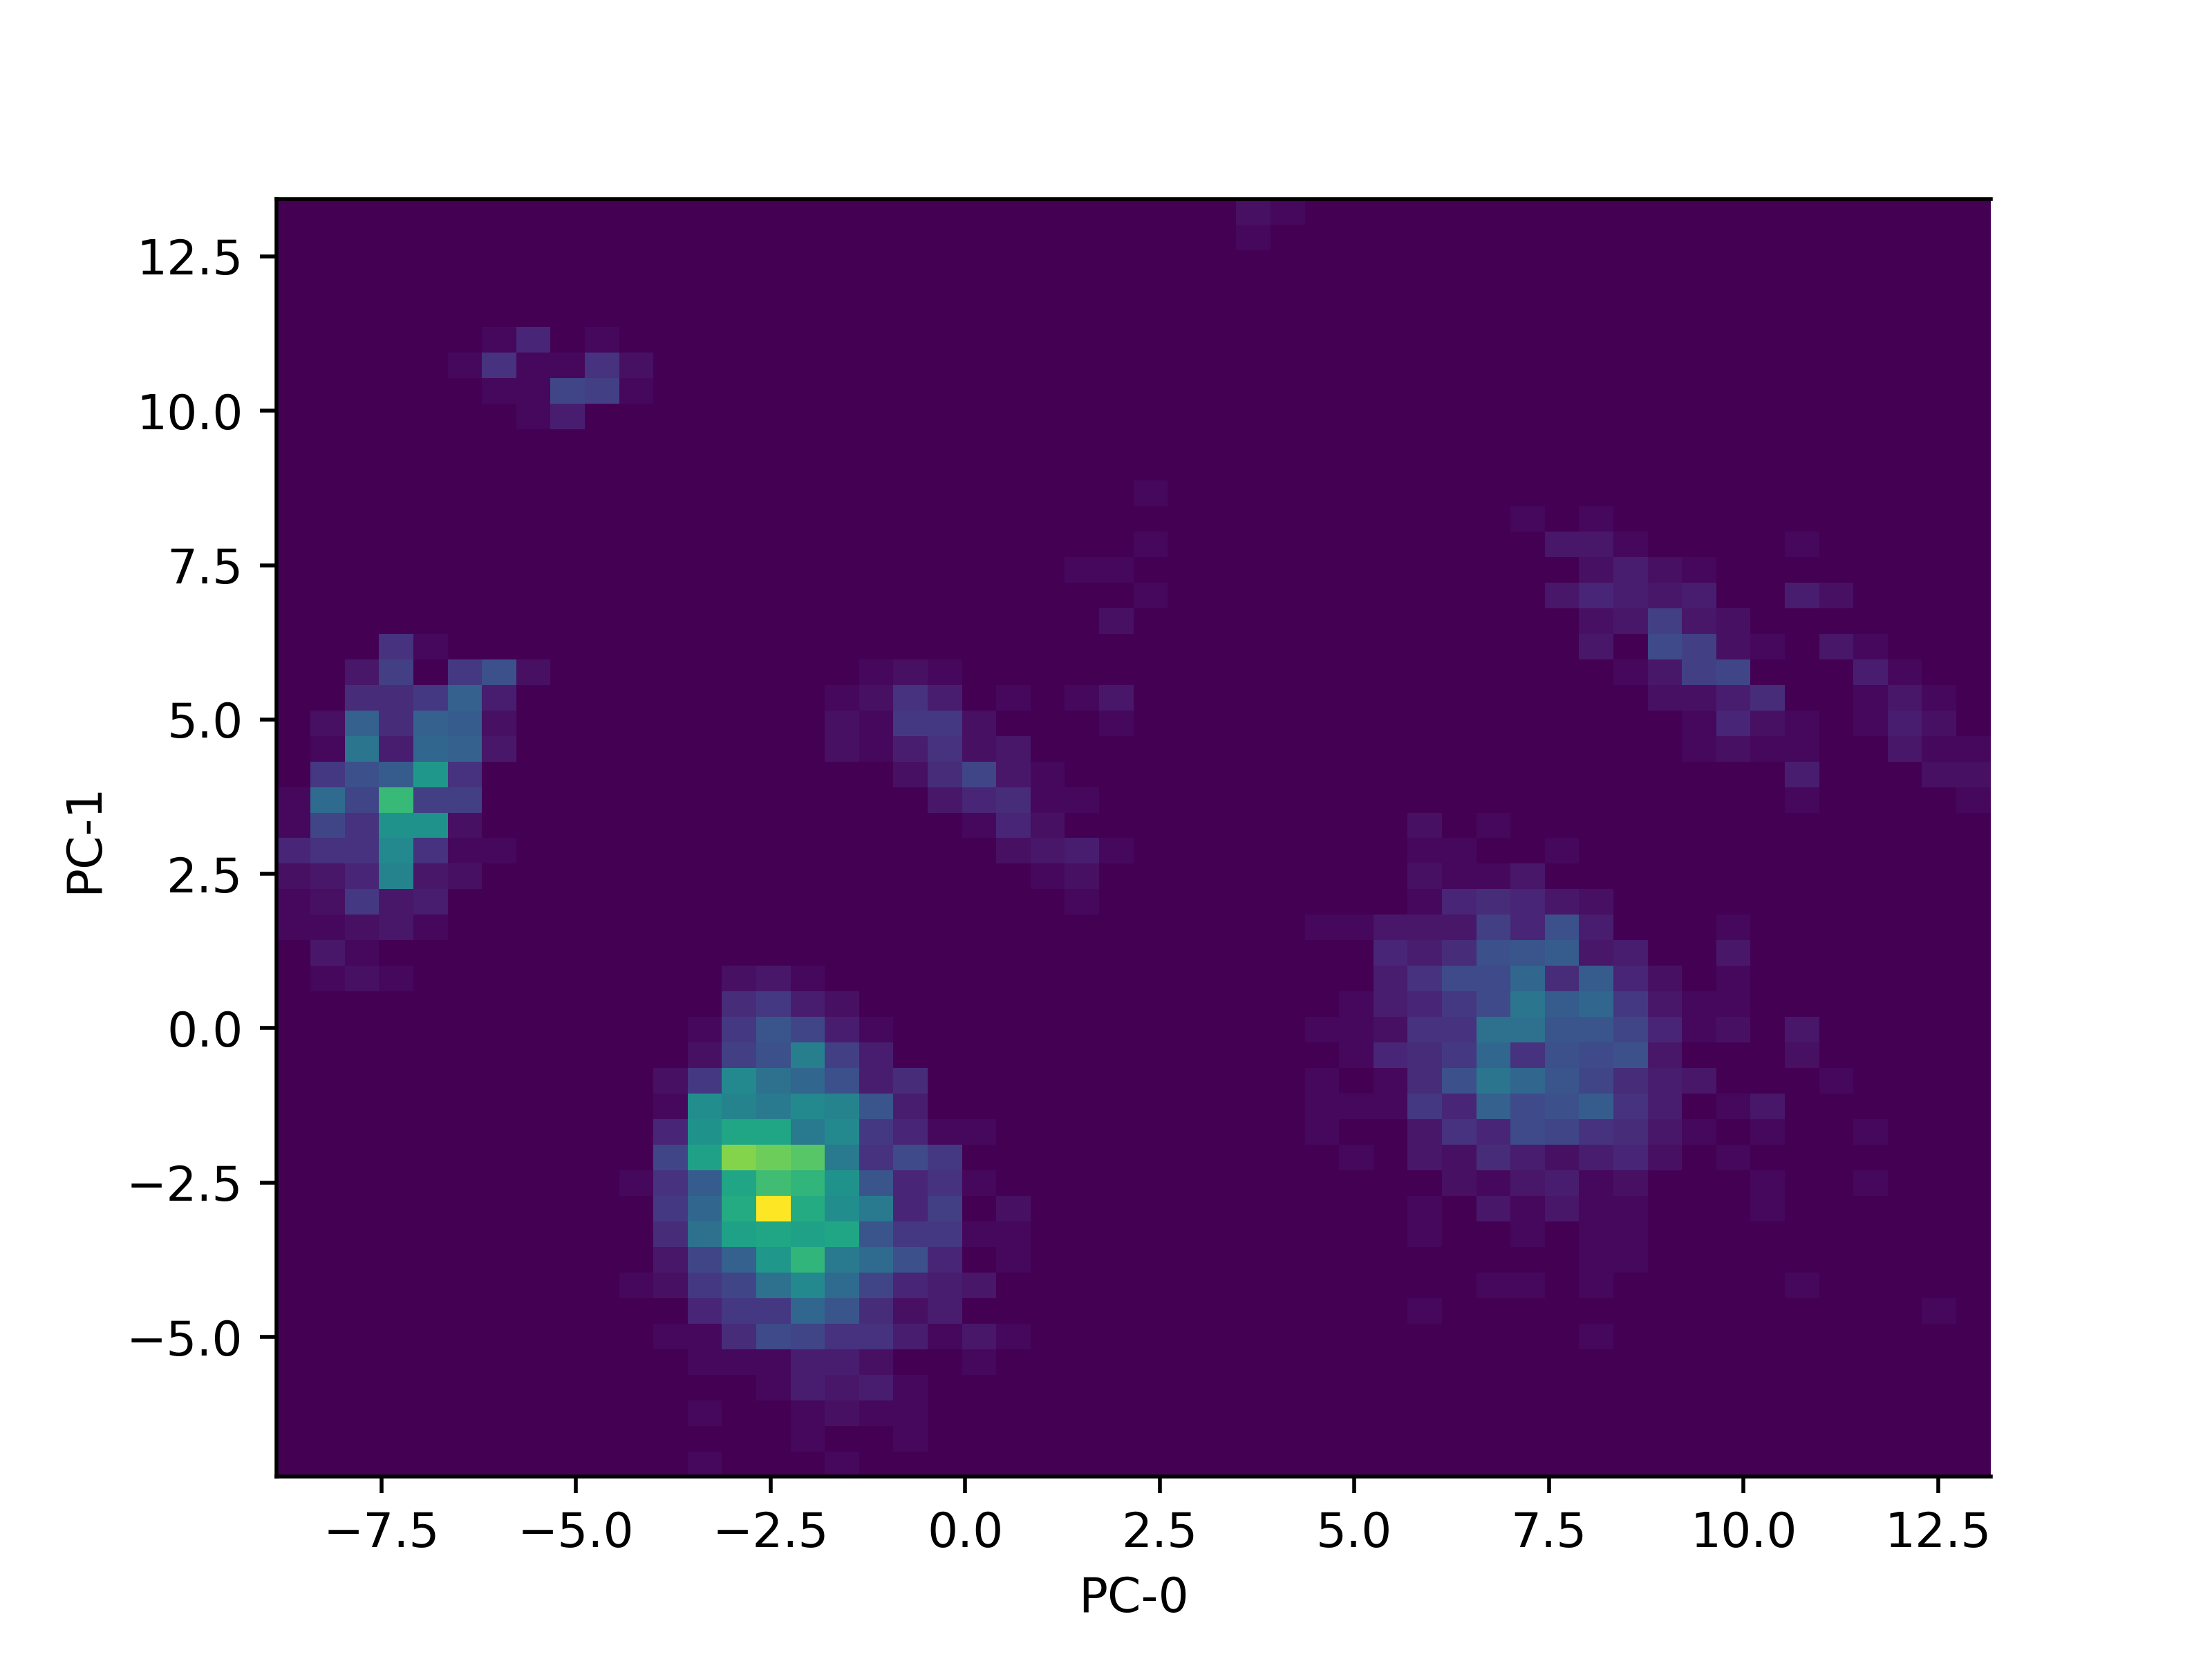

In [208]:
Image(filename=unique_user_saved_outputs+'/plots/pcproj_arpc3features_scaled.png', height=500, width=500)

In [209]:
labels_pca = hdbscan.HDBSCAN(
    min_samples=9,
    min_cluster_size=50,
).fit_predict(reduced_data)

In [210]:
for cluster in list(set(labels_pca)):

    print('cluster {} contains {}% of all members'.format(cluster, len(np.where(labels_pca==cluster)[0])/len(labels_pca)*100))

cluster 0 contains 1.6094746431825082% of all members
cluster 1 contains 3.978135438809596% of all members
cluster 2 contains 16.125113877922868% of all members
cluster 3 contains 48.739750986942% of all members
cluster 4 contains 5.344670513209839% of all members
cluster 5 contains 24.020649863346495% of all members
cluster -1 contains 0.18220467658669906% of all members


In [211]:
df_arpc3_features_clustering['cluster'] = labels_pca

In [212]:
# save the dataframe for subsequent notebooks
compression_opts = dict(method='zip',
                        archive_name=unique_user_saved_outputs+'/dataframes/df_arpc3_features_clustering.csv')  

df_arpc3_features_clustering.to_csv(unique_user_saved_outputs+'/dataframes/df_arpc3_features_clustering.zip', index=False,
                                                          compression=compression_opts) 

In [213]:
df_arpc3_features_clustering = pd.read_csv(unique_user_saved_outputs+'/dataframes/df_arpc3_features_clustering.zip')

# pca label feature distributions

In [214]:
%%capture

labels=labels_pca
plt.style.use('default')
df_features = df_arpc3_features_clustering
num_columns = 5
num_rows = int(np.ceil(len(column_labels)/num_columns)+1)

plot_position = 1 

f = plt.figure(dpi=500, figsize=(30,30))

for i in range(len(column_labels)):

    ax = f.add_subplot(num_rows, num_columns, plot_position)
    plot_position+=1
    
    all_feature_values = df_features[df_features.columns[i]].values
    
    for cluster_num in np.setdiff1d(labels, -1):
        
        cluster_features_indices = np.where(labels==cluster_num)[0]
        cluster_features = df_features[df_features.columns[i]].values[cluster_features_indices]
        ax.hist(cluster_features, label=cluster_num, bins='auto', density=True, histtype='step', cumulative=True)

    ax.set_xlabel(df_features.columns[i]+' ('+column_labels[i]+')',fontsize=5)
    ax.set_ylabel('cumulative frequency',fontsize=5)
    ax.set_xlim([np.max((np.min(all_feature_values),np.min(all_feature_values))),
                 np.min((np.max(all_feature_values),np.max(all_feature_values)))])
    ax.tick_params(axis='both', which='major', labelsize=3)
    ax.tick_params(axis='both', which='minor', labelsize=3)
    plt.legend(loc='best')
    plt.grid()
    
plt.savefig(unique_user_saved_outputs+'/plots/all_features_compared_between_classes_arpc3_clustering.png', bbox_inches='tight')

In [215]:
Image(filename=unique_user_saved_outputs+'/plots/all_features_compared_between_classes_arpc3_clustering.png', height=500, width=500)

In [216]:
class MidpointNormalize(mpl.colors.Normalize): # https://stackoverflow.com/questions/7404116/defining-the-midpoint-of-a-colormap-in-matplotlib
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))

# feature importance

In [217]:
%%capture

plt.style.use('default')
plt.rcParams['figure.figsize']=(3,2)
plt.rcParams['figure.dpi']=100
fig, ax = plt.subplots(1,1, constrained_layout=False, figsize=(10,10))
columns=column_labels
data = scaled_arpc3features
pc_model = PCA(n_components=5, random_state=817)
reduced_data = pc_model.fit_transform(data)

vmin = -1
vmax = 1
norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0)
cmap = 'bwr'

array_plot = pc_model.components_.T
im = ax.imshow(array_plot,
                interpolation='none', aspect=0.3, origin='upper', cmap=cmap, norm=norm)
# Major ticks
ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, len(columns), 1))

# Labels for major ticks
ax.set_xticklabels(['PC-0', 'PC-1'])
ax.set_yticklabels(df_features.columns[:len(columns)].values)


# Minor ticks
ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, len(columns), 1), minor=True)


ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
cba = fig.colorbar(im, shrink=1)
cba.set_label('absolute value of component in feature space', rotation=270, labelpad=15)
cax = cba.ax
pos = cax.get_position()
pos_new = [pos.x0-1, pos.y0, pos.width, pos.height]
cax.set_position(pos_new)
for (j,i),label in np.ndenumerate(array_plot):
    ax.text(i,j,str(np.around(label,3)),ha='center',va='center')

plt.title('magnitude of principal \ncomponent vector along feature space')
plt.tight_layout()

plt.savefig(unique_user_saved_outputs+'/plots/PC_heatmap_arpc3features.png')

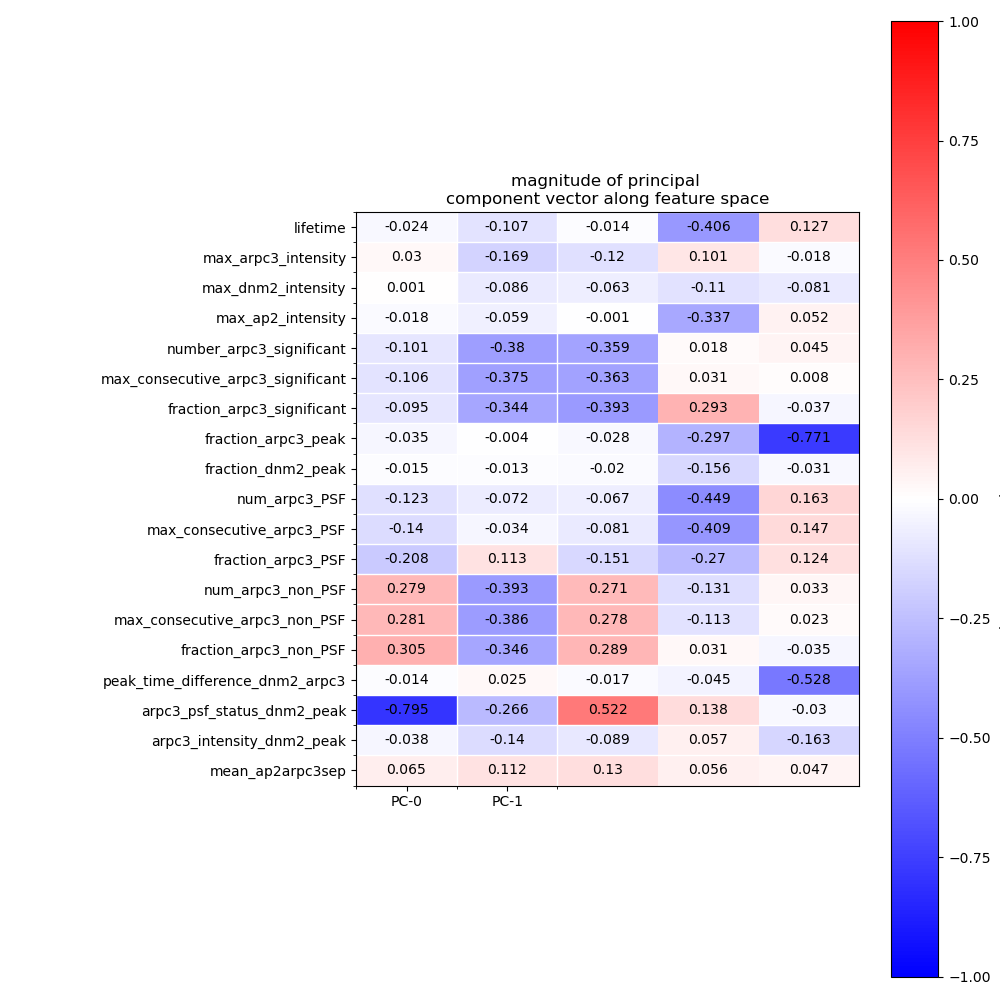

In [218]:
Image(filename=unique_user_saved_outputs+'/plots/PC_heatmap_arpc3features.png', height=500, width=500)

In [219]:
%%capture

plt.style.use('default')

plt.rcParams['figure.figsize']=(3,2)
plt.rcParams['figure.dpi']=500
fig, ax = plt.subplots(1,1, constrained_layout=False, figsize=(10,10))

data = scaled_arpc3features
pc_model = PCA(n_components=5, random_state=817)
reduced_data = pc_model.fit_transform(data)

vmin = 0
vmax = 1
norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0.4)
cmap = 'YlGnBu'

array_plot = np.abs(pc_model.components_.T)
im = ax.imshow(array_plot,
                interpolation='none', aspect=0.3, origin='upper', norm=norm, cmap=cmap)
# Major ticks
ax.set_xticks(np.arange(0, 2, 1))
ax.set_yticks(np.arange(0, len(columns), 1))

# Labels for major ticks
ax.set_xticklabels(['PC-0', 'PC-1'])
ax.set_yticklabels(df_features.columns[:len(columns)].values)


# Minor ticks
ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
ax.set_yticks(np.arange(-.5, len(columns), 1), minor=True)


ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
cba = fig.colorbar(im, shrink=1)
cba.set_label('absolute value of component in feature space', rotation=270, labelpad=15)
cax = cba.ax
pos = cax.get_position()
pos_new = [pos.x0-1, pos.y0, pos.width, pos.height]
cax.set_position(pos_new)
for (j,i),label in np.ndenumerate(array_plot):
    ax.text(i,j,str(np.around(label,3)),ha='center',va='center')

plt.title('magnitude of principal \ncomponent vector along feature space')
plt.tight_layout()

plt.savefig(unique_user_saved_outputs+'/plots/PC_heatmap_abs_arpc3features.png')

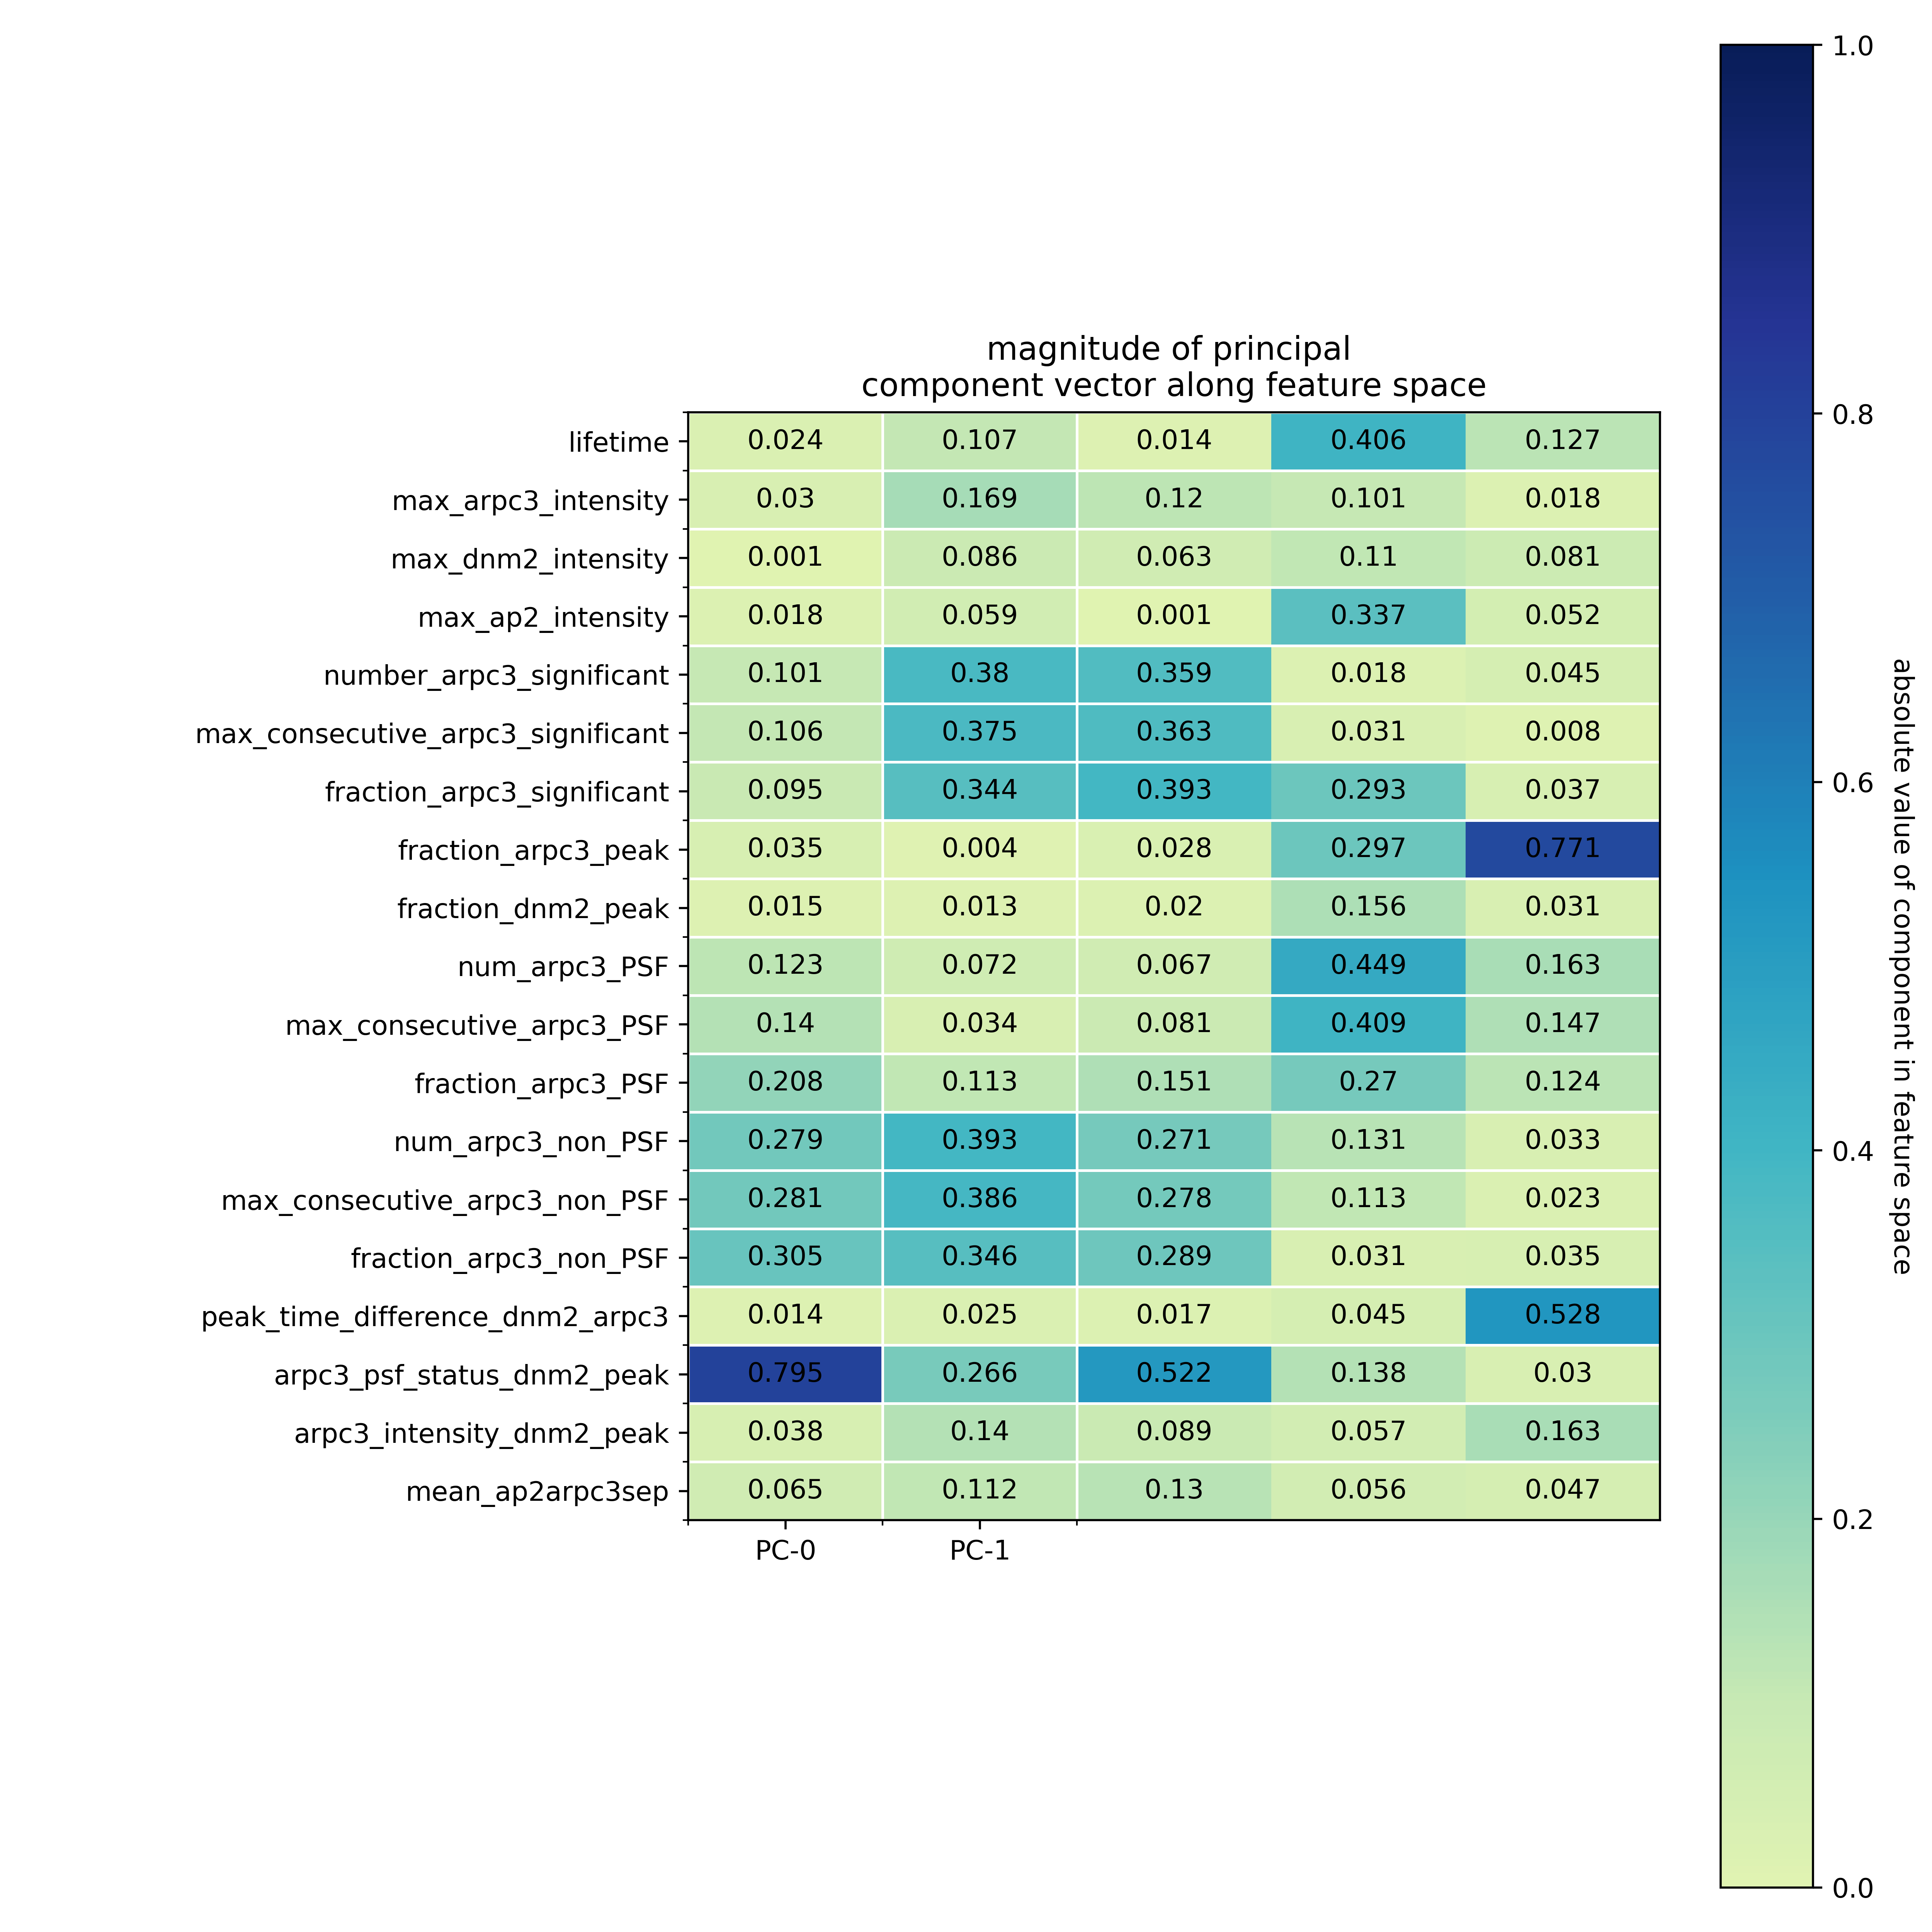

In [220]:
Image(filename=unique_user_saved_outputs+'/plots/PC_heatmap_abs_arpc3features.png', height=500, width=500)

# align tracks

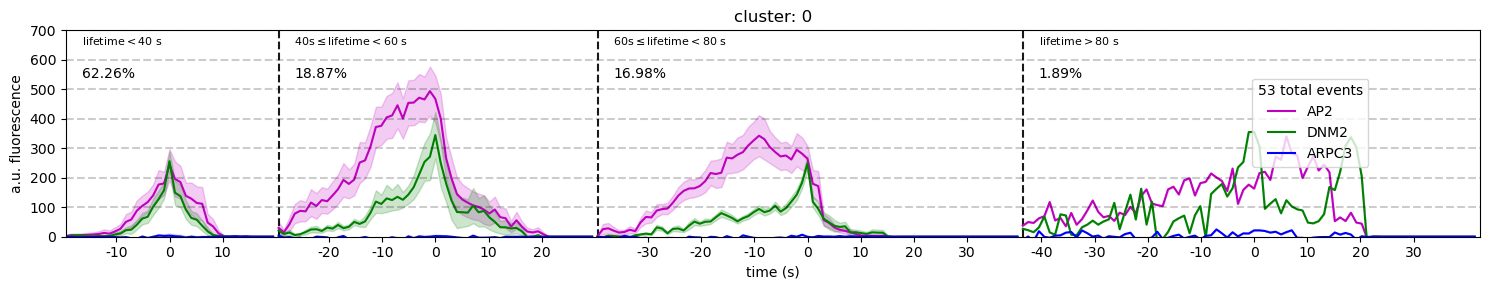

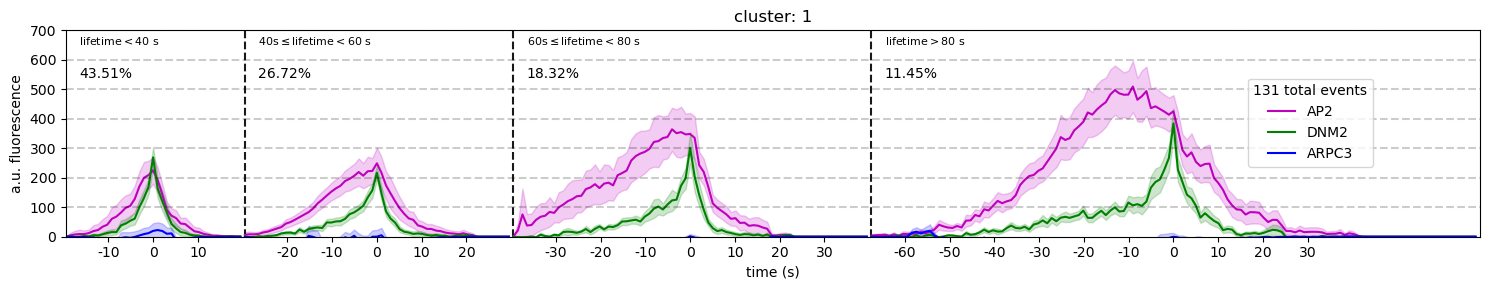

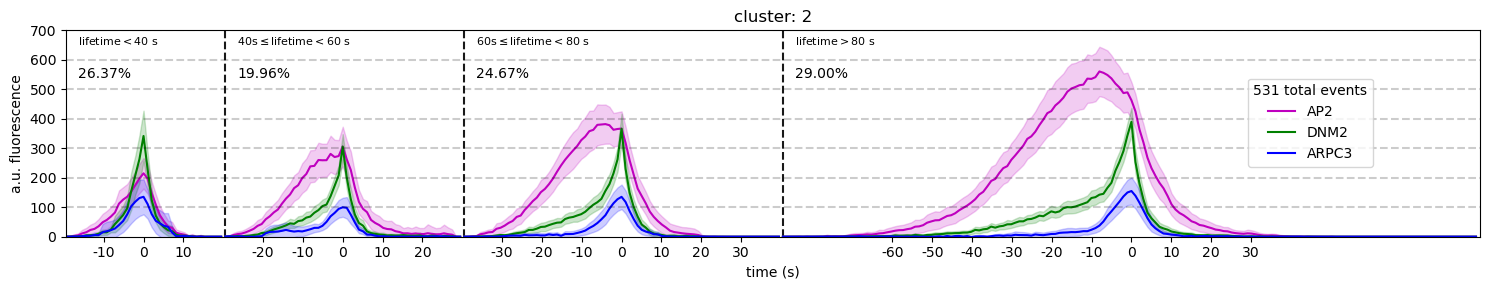

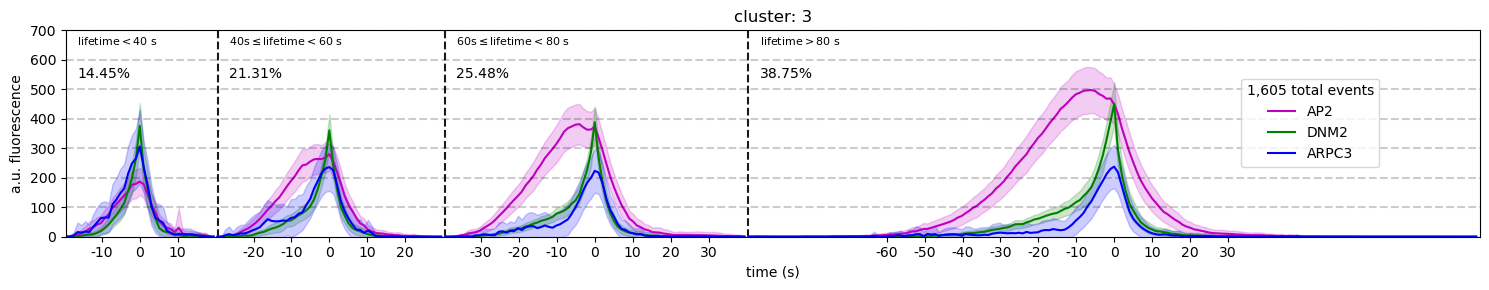

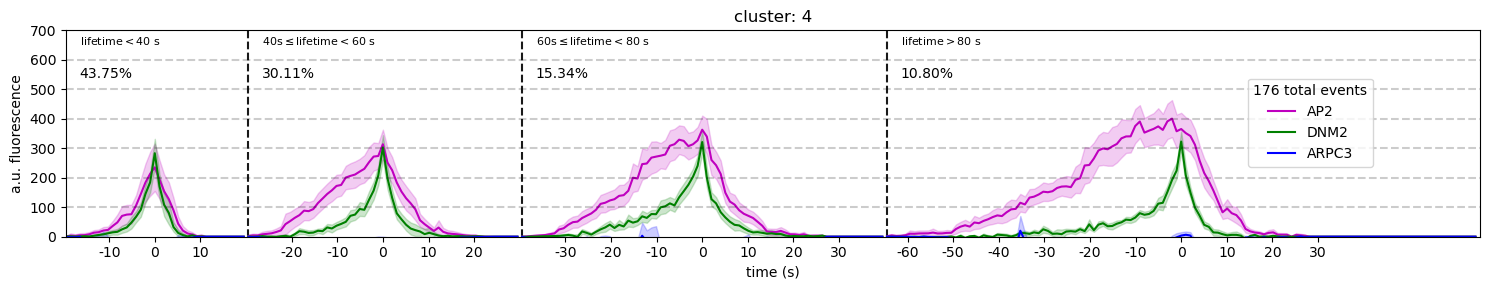

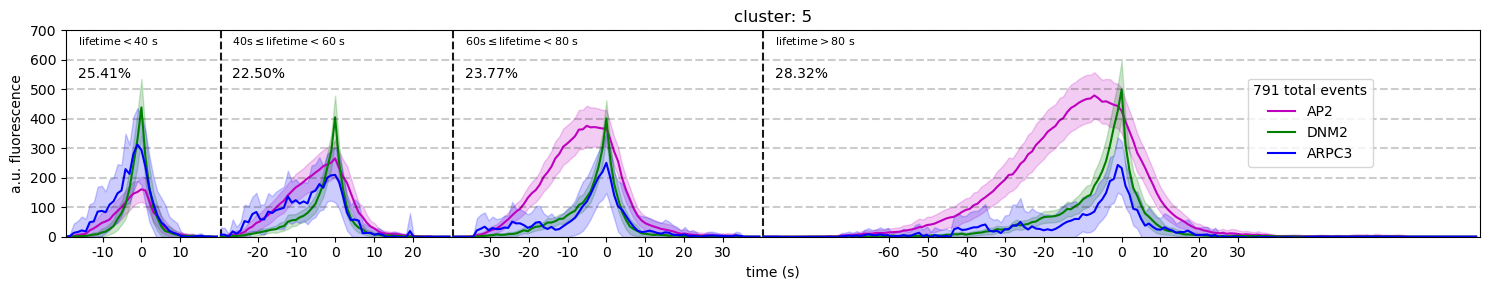

In [221]:
plt.style.use('default')

for pca_cluster in set(np.setdiff1d(labels_pca, -1)):
    
    events_kept_cluster = events_kept[np.where(labels_pca==pca_cluster)[0]]

    fig, axes = plt.subplots(1, 1, dpi=100, figsize=(15,3))
    # axes_separation = axes.twinx()
    
    channel_amplitudes = []
    lifetimes = []
    for track_idx in range(len(events_kept_cluster)):
        current_event = []
        lifetimes.append(len(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 0)))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 0))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 1))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 2))
        channel_amplitudes.append(current_event)
    
    
    cohorts = [[min(lifetimes),40],[40,60],[60,80],[80,max(lifetimes)]]

    offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes], 
                                                                             channel_amplitudes, 
                                                                             1, 
                                                                             cohorts, 
                                                                             [0, 1, 2], 
                                                                             [], 
                                                                             ['AP2', 'DNM2', 'ARPC3'],
                                                                             ['m', 'g', 'b'])

    lines_0, labels_0 = axes.get_legend_handles_labels()
    axes.legend(lines_0, labels_0, 
                loc='upper center', 
                bbox_to_anchor=(0.88, 0.8), 
                title="{:,}".format(len(channel_amplitudes)) + ' total events')

    y_lines = np.arange(0,800,100)

    for i in range(1,len(y_lines)):

        axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)

    text_horizontal_shifts = 3
    text_percentage_y = 540
    text_bounds_y = 650

    for i in range(len(cohorts)):

        if i==0:
            axes.text(text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
            axes.text(text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes)) + '%')
        elif i==len(cohorts)-1:
            axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, '$\mathregular{lifetime >}$'+str(cohorts[i][0])+' s', fontsize=8)
            axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes)) + '%')
        else:
            axes.text(offsets[i]+text_horizontal_shifts, text_bounds_y, str(cohorts[i][0])+'$\mathregular{s \leq lifetime <}$'+str(cohorts[i][1])+' s', fontsize=8)
            axes.text(offsets[i]+text_horizontal_shifts, text_percentage_y, "{:.2f}".format(100*num_in_cohort[i]/len(channel_amplitudes)) + '%')

    x_positions_ticks = []
    x_labels_ticks = []
    max_ticks_per_cohort = [[1, 1], [2, 2], [3, 3], [6, 3]]

    for i in range(len(max_dnm2_cohort_indices)):


        num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
        num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))
        for j in range(num_ticks_before):

            x_labels_ticks.append(-10*(j+1))
            x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])

        x_labels_ticks.append(0)
        x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])

        for j in range(num_ticks_after):

            x_labels_ticks.append(10*(j+1))
            x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


    axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
    axes.set_xticklabels(x_labels_ticks, minor=False)


    axes.set_xlabel('time (s)') 
    axes.set_ylabel('a.u. fluorescence')
    axes.set_title('cluster: '+str(pca_cluster))
    axes.set_xlim([0,offsets[-1]+cohorts[-1][-1]])    
    axes.set_ylim([0,700])  
    plt.tight_layout() 
    plt.show()

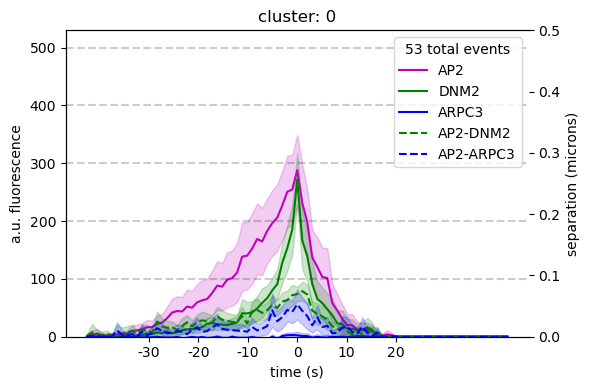

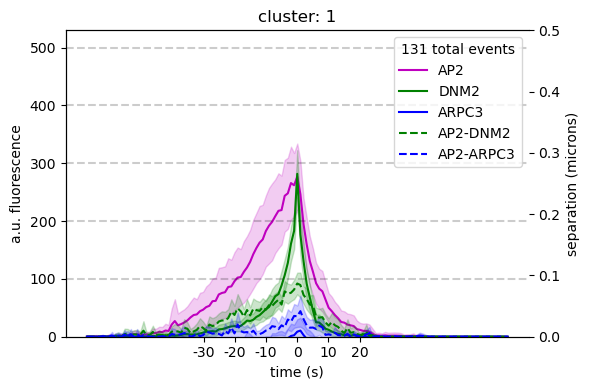

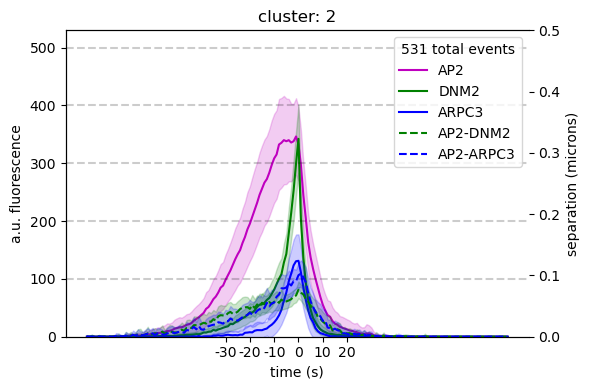

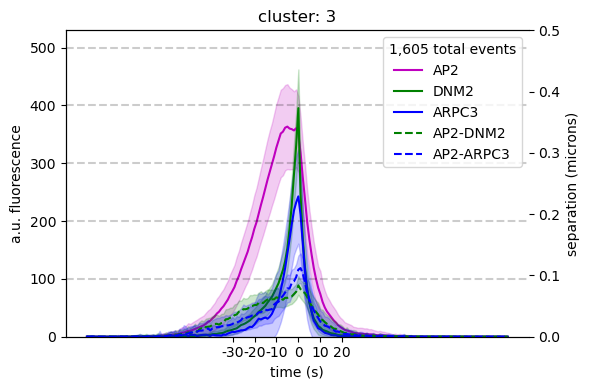

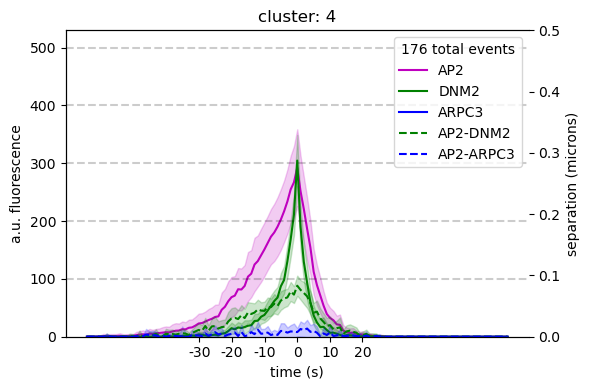

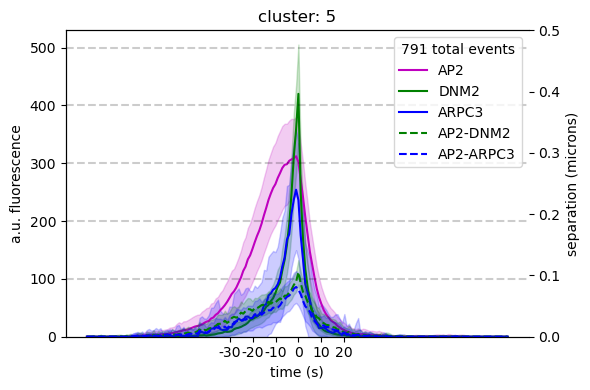

In [222]:
#     np.sqrt((0.108*(ch0_x[channel_0_index]-ch1_x[channel_0_index]))**2 + (0.108*(ch0_y[channel_0_index]-ch1_y[channel_0_index]))**2)) # ap2-dnm2 separation
labels=labels_pca
for cluster_num in set(np.setdiff1d(labels, -1)):
    
    events_kept_cluster = events_kept[np.where(labels==cluster_num)[0]]

    # axes_separation = axes.twinx()
    
    channel_amplitudes = []
    lifetimes = []
    for track_idx in range(len(events_kept_cluster)):
        current_event = []
        lifetimes.append(len(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 0)))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 0))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 1))
        current_event.append(return_track_attributes.return_track_amplitude_no_buffer_channel(events_kept_cluster, track_idx, 2))
        ch0_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept_cluster, track_idx, 0) # positions of ap2 and dnm2
        ch0_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept_cluster, track_idx, 0)
        ch1_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept_cluster, track_idx, 1)
        ch1_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept_cluster, track_idx, 1)
        ch2_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(events_kept_cluster, track_idx, 2)
        ch2_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(events_kept_cluster, track_idx, 2)
        current_event.append(np.sqrt((0.108*(ch0_x-ch1_x))**2 + (0.108*(ch0_y-ch1_y))**2))
        current_event.append(np.sqrt((0.108*(ch0_x-ch2_x))**2 + (0.108*(ch0_y-ch2_y))**2))
        
        channel_amplitudes.append(current_event)
  
        
    plt.style.use('default')
    plt.rcParams['axes.spines.right'] = False

    fig, axes = plt.subplots(1, 1, dpi=100, figsize=(6,4))
    axes_separation = axes.twinx()

    cohorts = [[min(lifetimes), max(lifetimes)]]

    offsets, num_in_cohort, max_dnm2_cohort_indices = display_tracks.plot_separated_cohorts([axes, axes_separation], 
                                                                             channel_amplitudes, 
                                                                             1, 
                                                                             cohorts, 
                                                                             [0, 1, 2], 
                                                                             [3, 4], 
                                                                             ['AP2', 'DNM2', 'ARPC3', 'AP2-DNM2', 'AP2-ARPC3'],
                                                                             ['m', 'g', 'b', 'g', 'b'])

    lines_0, labels_0 = axes.get_legend_handles_labels()
    lines_1, labels_1 = axes_separation.get_legend_handles_labels()
    axes.legend(lines_0+lines_1, labels_0+labels_1, 
                loc='upper right',
                title="{:,}".format(len(channel_amplitudes)) + ' total events')
    y_lines = np.arange(0,600,100)

    for i in range(1,len(y_lines)):

        axes.axhline(y_lines[i], 0, 1, linestyle='--', color='black', alpha=0.2)


    x_positions_ticks = []
    x_labels_ticks = []
    max_ticks_per_cohort = [[3, 2]]

    for i in range(len(max_dnm2_cohort_indices)):


        num_ticks_before = np.min((int(np.floor((max_dnm2_cohort_indices[i])/10)),max_ticks_per_cohort[i][0]))
        num_ticks_after = np.min((int(np.ceil((cohorts[i][1]-max_dnm2_cohort_indices[i])/10)-1),max_ticks_per_cohort[i][1]))

        for j in range(num_ticks_before):

            x_labels_ticks.append(-10*(j+1))
            x_positions_ticks.append(-10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])

        x_labels_ticks.append(0)
        x_positions_ticks.append(offsets[i] + max_dnm2_cohort_indices[i])

        for j in range(num_ticks_after):

            x_labels_ticks.append(10*(j+1))
            x_positions_ticks.append(10*(j+1) + offsets[i] + max_dnm2_cohort_indices[i])


    axes.set_xticks(0.5+np.array(x_positions_ticks), minor=False)
    axes.set_xticklabels(x_labels_ticks, minor=False)


    axes.set_xlabel('time (s)') 
    axes.set_ylabel('a.u. fluorescence')
    axes.set_title('cluster: '+str(cluster_num))
#     axes.set_xlim([50,120])    
    axes.set_ylim([0,530])
    axes_separation.set_ylim([0,0.5])
    axes_separation.set_ylabel('separation (microns)')
#     axes.axvline(120, color='black', linewidth=5, linestyle='--')
    plt.tight_layout()   


# pair-wise distribution comparisons between ap2-arpc3 separation and features

In [223]:
arpc3_positive_clusters = [2,3,5]








cluster number 2






mean_ap2arpc3sep lifetime
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.226  [-0.31, -0.14]  0.051   0.048    0.0    1.0


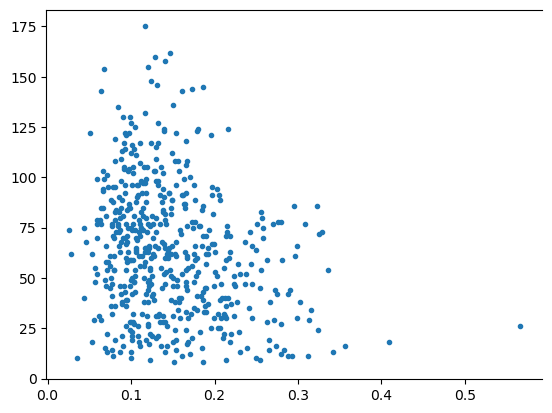

mean_ap2arpc3sep max_arpc3_intensity
            n     r          CI95%     r2  adj_r2  p-val  power
spearman  531 -0.18  [-0.26, -0.1]  0.032   0.029    0.0  0.987


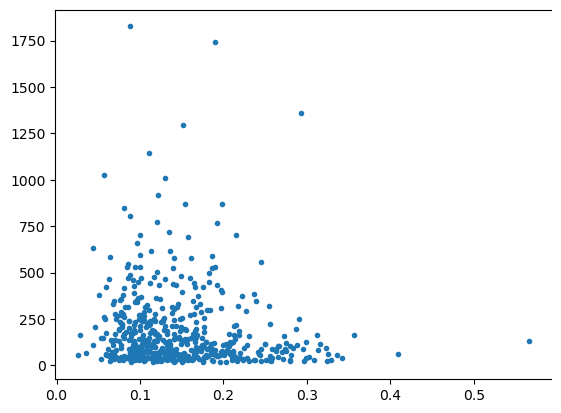

mean_ap2arpc3sep max_dnm2_intensity
            n      r           CI95%    r2  adj_r2  p-val  power
spearman  531 -0.173  [-0.25, -0.09]  0.03   0.026    0.0  0.981


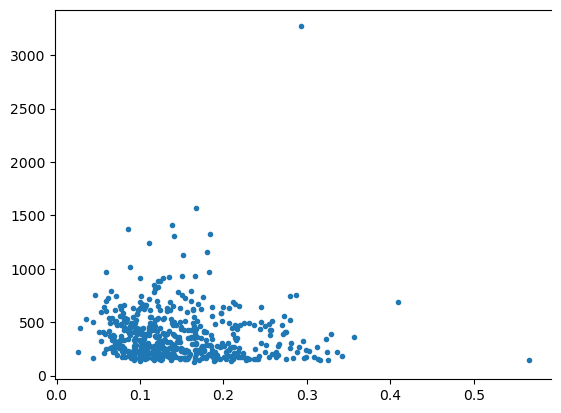

mean_ap2arpc3sep max_ap2_intensity
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.134  [-0.22, -0.05]  0.018   0.014  0.002  0.874


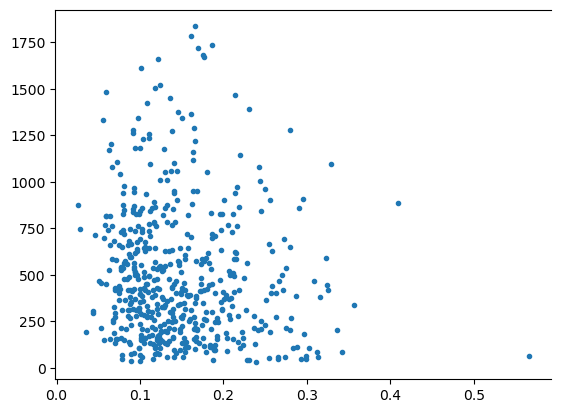

mean_ap2arpc3sep number_arpc3_significant
            n      r          CI95%     r2  adj_r2  p-val  power
spearman  531 -0.277  [-0.35, -0.2]  0.077   0.073    0.0    1.0


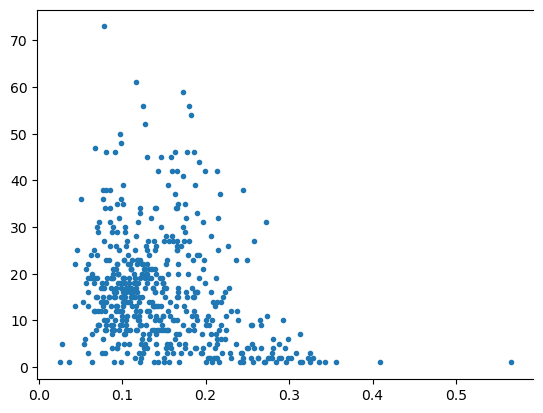

mean_ap2arpc3sep max_consecutive_arpc3_significant
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.383  [-0.45, -0.31]  0.147   0.144    0.0    1.0


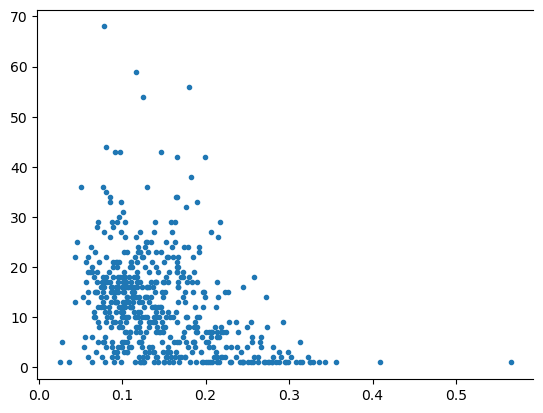

mean_ap2arpc3sep fraction_arpc3_significant
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.128  [-0.21, -0.04]  0.016   0.013  0.003  0.843


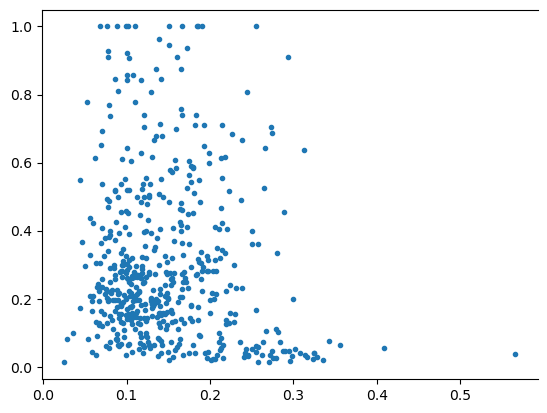

mean_ap2arpc3sep fraction_arpc3_peak
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.247  [-0.32, -0.17]  0.061   0.057    0.0    1.0


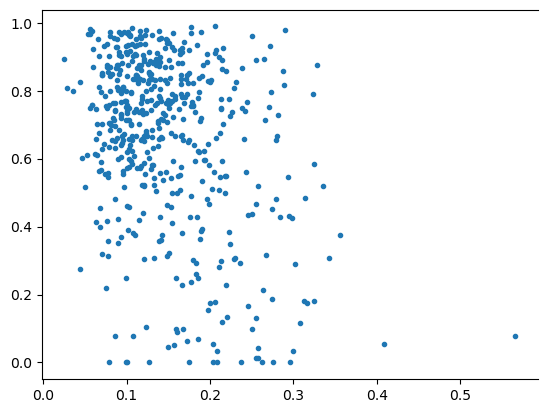

mean_ap2arpc3sep fraction_dnm2_peak
            n     r          CI95%     r2  adj_r2  p-val  power
spearman  531 -0.18  [-0.26, -0.1]  0.032   0.029    0.0  0.987


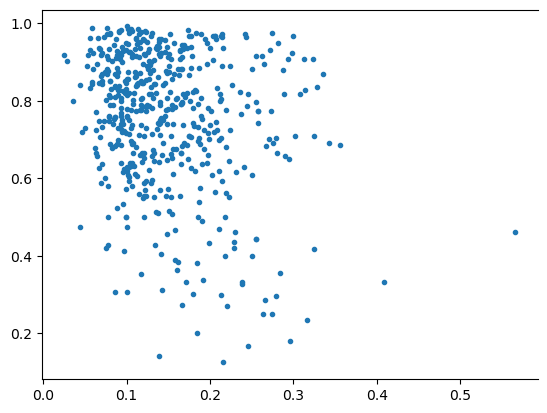

mean_ap2arpc3sep num_arpc3_PSF
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.236  [-0.32, -0.15]  0.056   0.052    0.0    1.0


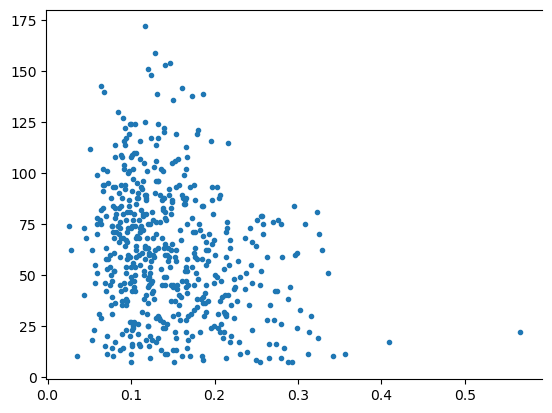

mean_ap2arpc3sep max_consecutive_arpc3_PSF
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.254  [-0.33, -0.17]  0.064   0.061    0.0    1.0


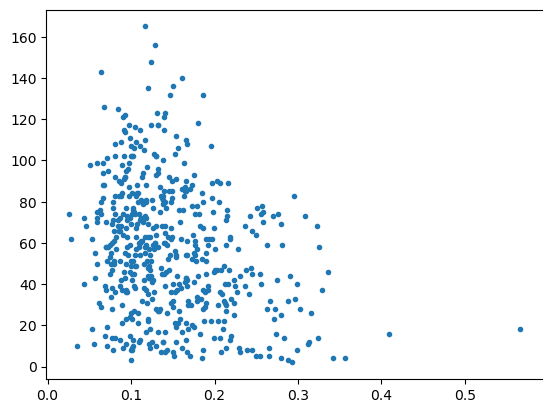

mean_ap2arpc3sep fraction_arpc3_PSF
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.192  [-0.27, -0.11]  0.037   0.033    0.0  0.994


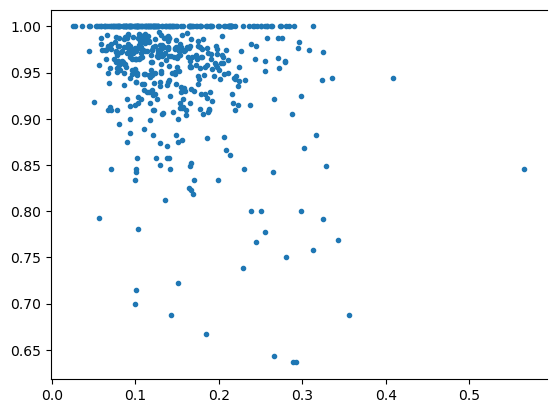

mean_ap2arpc3sep num_arpc3_non_PSF
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  531 NaN    NaN NaN     NaN    NaN   NaN    NaN


An input array is constant; the correlation coefficent is not defined.


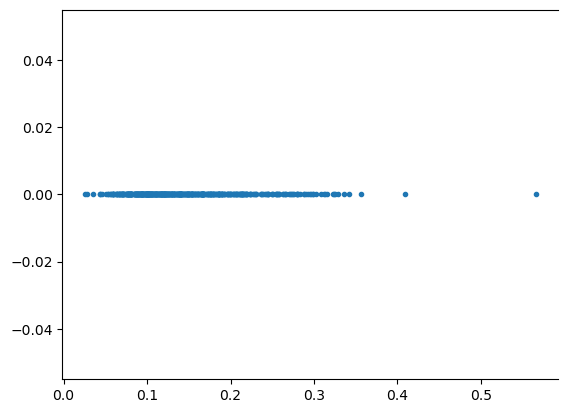

mean_ap2arpc3sep max_consecutive_arpc3_non_PSF
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  531 NaN    NaN NaN     NaN    NaN   NaN    NaN


An input array is constant; the correlation coefficent is not defined.


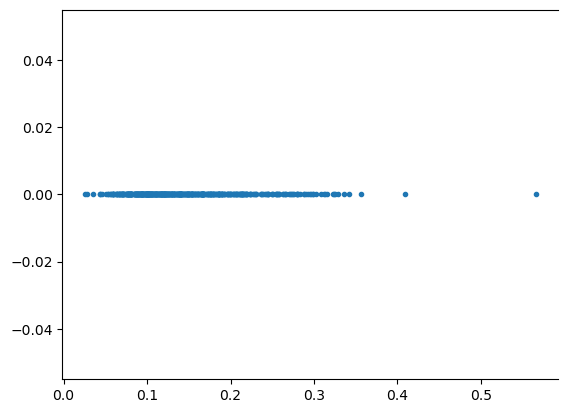

mean_ap2arpc3sep fraction_arpc3_non_PSF
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  531 NaN    NaN NaN     NaN    NaN   NaN    NaN


An input array is constant; the correlation coefficent is not defined.


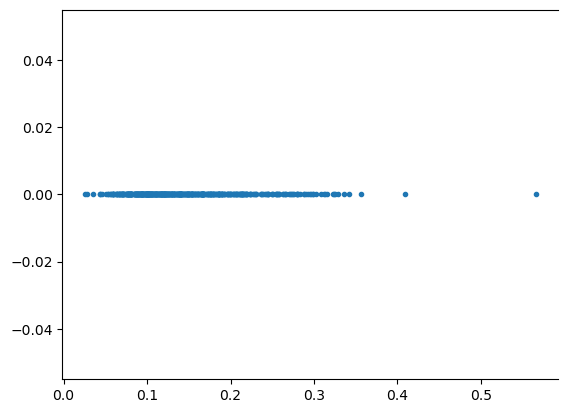

mean_ap2arpc3sep peak_time_difference_dnm2_arpc3
            n      r         CI95%   r2  adj_r2  p-val  power
spearman  531 -0.016  [-0.1, 0.07]  0.0  -0.004  0.709  0.066


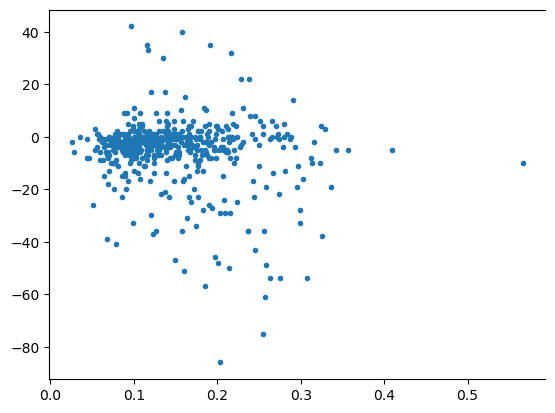

mean_ap2arpc3sep arpc3_psf_status_dnm2_peak
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  531 NaN    NaN NaN     NaN    NaN   NaN    NaN


An input array is constant; the correlation coefficent is not defined.


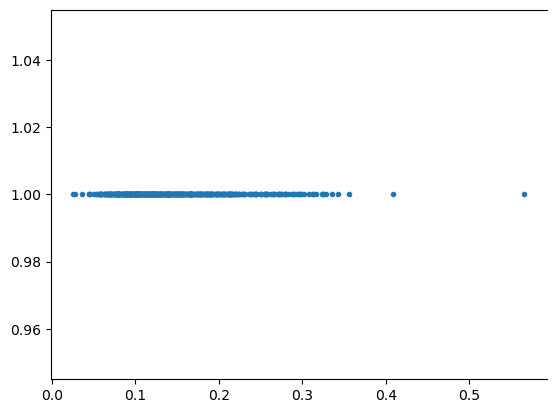

mean_ap2arpc3sep arpc3_intensity_dnm2_peak
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.305  [-0.38, -0.23]  0.093   0.089    0.0    1.0


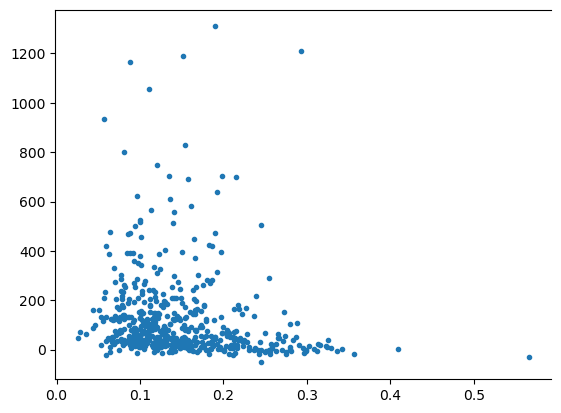

mean_ap2arpc3sep mean_ap2arpc3sep
            n    r       CI95%   r2  adj_r2  p-val  power
spearman  531  1.0  [1.0, 1.0]  1.0     1.0    0.0    1.0


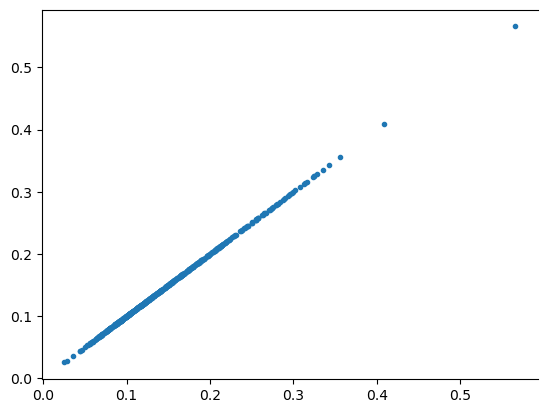

mean_ap2arpc3sep cluster
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  531 NaN    NaN NaN     NaN    NaN   NaN    NaN


An input array is constant; the correlation coefficent is not defined.


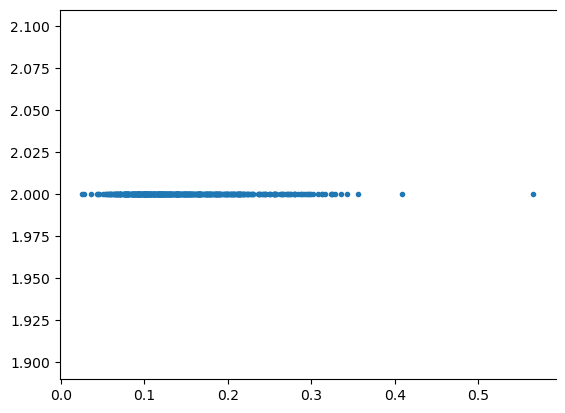








cluster number 3






mean_ap2arpc3sep lifetime
             n     r         CI95%     r2  adj_r2  p-val  power
spearman  1605 -0.15  [-0.2, -0.1]  0.022   0.021    0.0    1.0


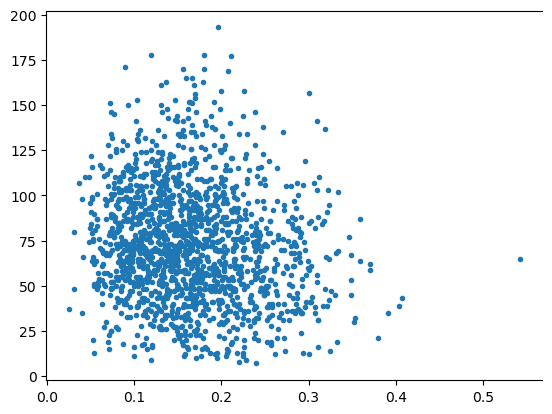

mean_ap2arpc3sep max_arpc3_intensity
             n      r         CI95%     r2  adj_r2  p-val  power
spearman  1605  0.069  [0.02, 0.12]  0.005   0.004  0.006  0.791


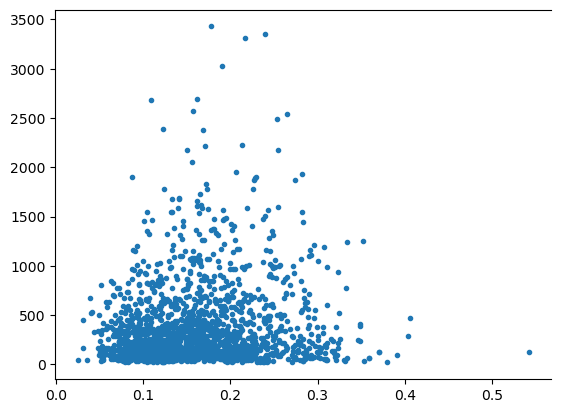

mean_ap2arpc3sep max_dnm2_intensity
             n      r           CI95%     r2  adj_r2  p-val  power
spearman  1605 -0.206  [-0.25, -0.16]  0.043   0.041    0.0    1.0


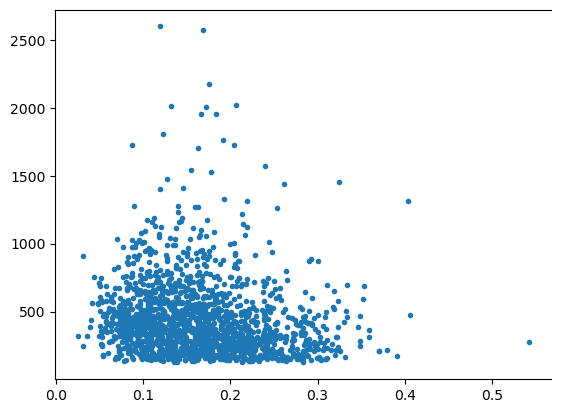

mean_ap2arpc3sep max_ap2_intensity
             n      r           CI95%    r2  adj_r2  p-val  power
spearman  1605 -0.223  [-0.27, -0.18]  0.05   0.049    0.0    1.0


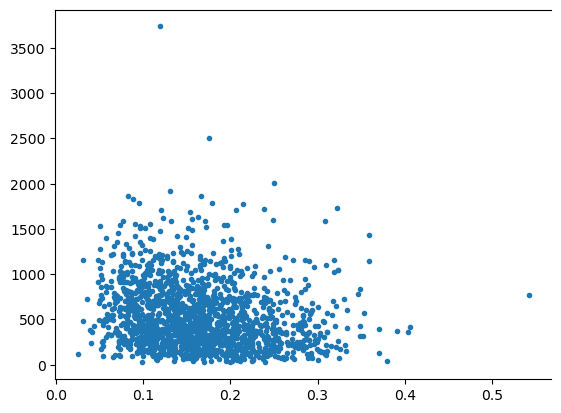

mean_ap2arpc3sep number_arpc3_significant
             n    r           CI95%    r2  adj_r2  p-val  power
spearman  1605 -0.1  [-0.15, -0.05]  0.01   0.009    0.0  0.981


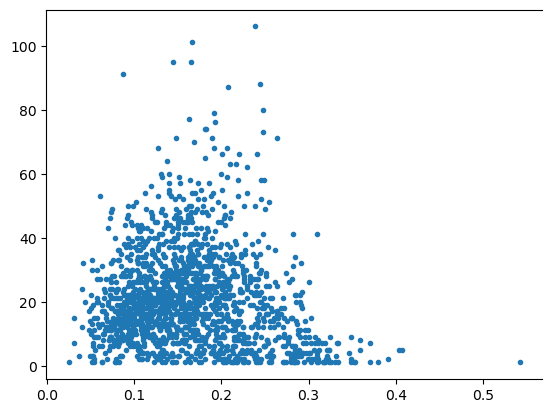

mean_ap2arpc3sep max_consecutive_arpc3_significant
             n      r           CI95%     r2  adj_r2  p-val  power
spearman  1605 -0.291  [-0.34, -0.25]  0.085   0.084    0.0    1.0


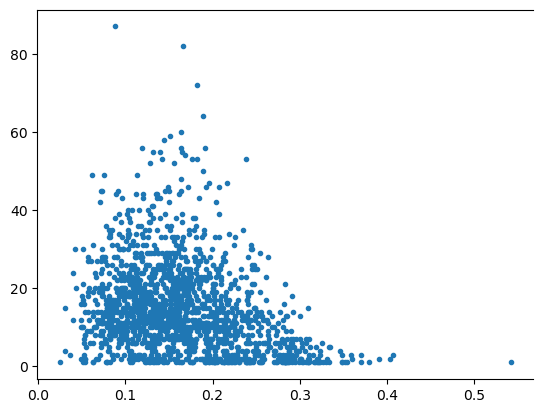

mean_ap2arpc3sep fraction_arpc3_significant
             n      r          CI95%   r2  adj_r2  p-val  power
spearman  1605 -0.009  [-0.06, 0.04]  0.0  -0.001  0.711  0.066


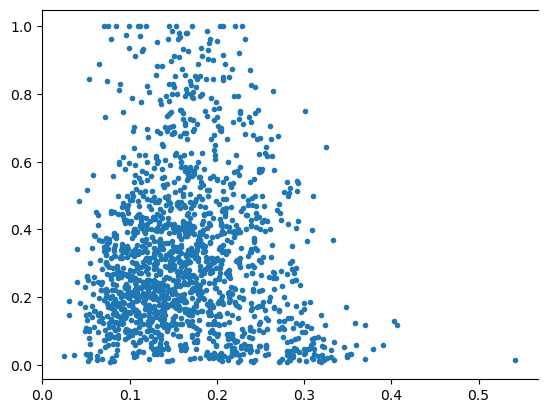

mean_ap2arpc3sep fraction_arpc3_peak
             n      r           CI95%    r2  adj_r2  p-val  power
spearman  1605 -0.265  [-0.31, -0.22]  0.07   0.069    0.0    1.0


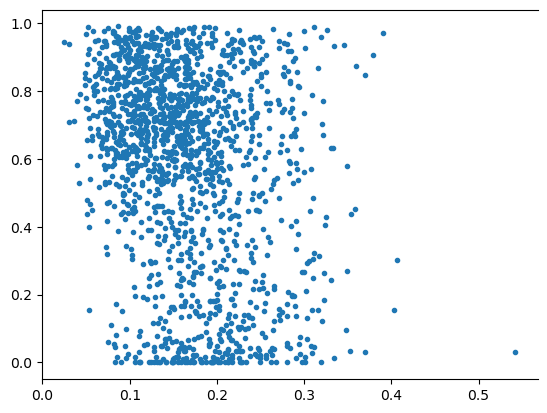

mean_ap2arpc3sep fraction_dnm2_peak
             n      r           CI95%    r2  adj_r2  p-val  power
spearman  1605 -0.098  [-0.15, -0.05]  0.01   0.008    0.0  0.975


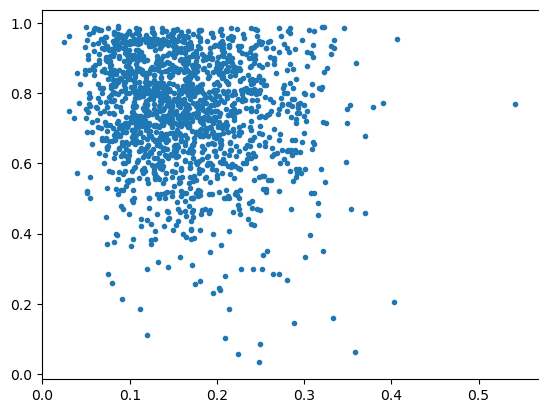

mean_ap2arpc3sep num_arpc3_PSF
             n     r           CI95%     r2  adj_r2  p-val  power
spearman  1605 -0.21  [-0.26, -0.16]  0.044   0.043    0.0    1.0


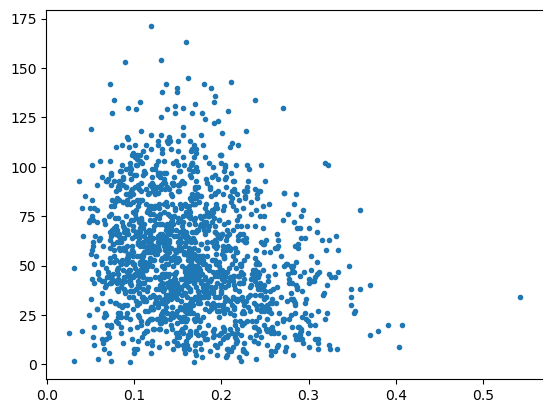

mean_ap2arpc3sep max_consecutive_arpc3_PSF
             n      r           CI95%    r2  adj_r2  p-val  power
spearman  1605 -0.284  [-0.33, -0.24]  0.08   0.079    0.0    1.0


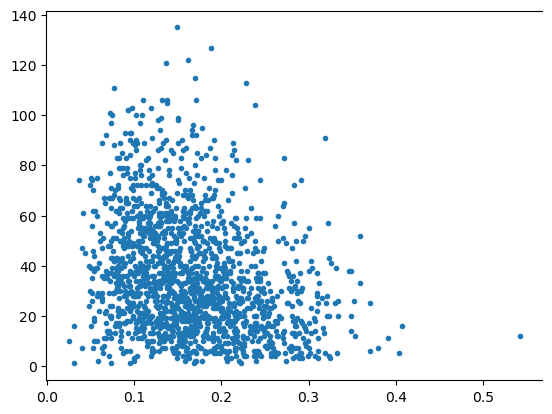

mean_ap2arpc3sep fraction_arpc3_PSF
             n      r           CI95%     r2  adj_r2  p-val  power
spearman  1605 -0.193  [-0.24, -0.15]  0.037   0.036    0.0    1.0


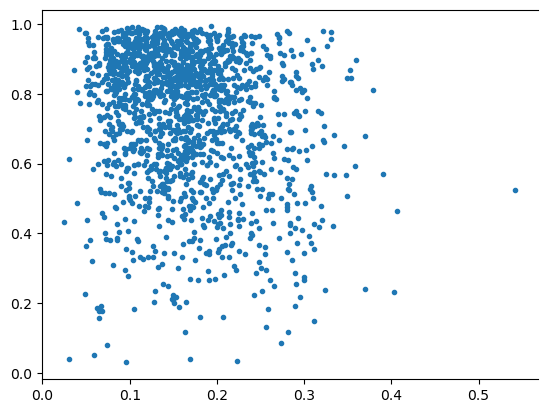

mean_ap2arpc3sep num_arpc3_non_PSF
             n    r         CI95%    r2  adj_r2  p-val  power
spearman  1605  0.1  [0.05, 0.15]  0.01   0.009    0.0   0.98


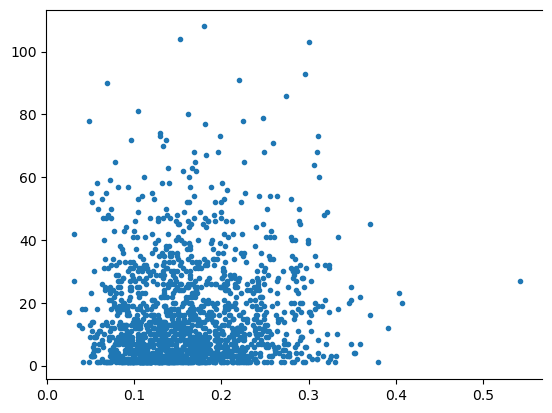

mean_ap2arpc3sep max_consecutive_arpc3_non_PSF
             n      r       CI95%     r2  adj_r2  p-val  power
spearman  1605  0.049  [0.0, 0.1]  0.002   0.001  0.049  0.504


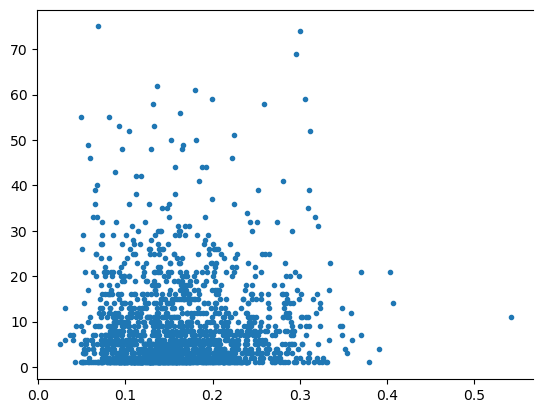

mean_ap2arpc3sep fraction_arpc3_non_PSF
             n      r         CI95%     r2  adj_r2  p-val  power
spearman  1605  0.176  [0.13, 0.22]  0.031    0.03    0.0    1.0


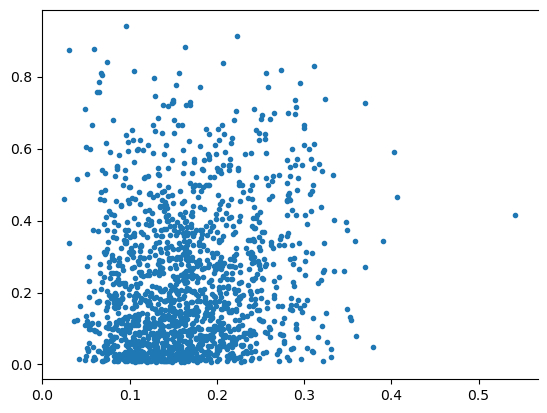

mean_ap2arpc3sep peak_time_difference_dnm2_arpc3
             n     r           CI95%     r2  adj_r2  p-val  power
spearman  1605 -0.16  [-0.21, -0.11]  0.026   0.024    0.0    1.0


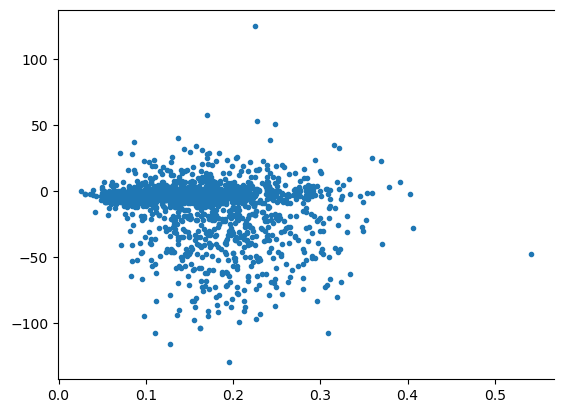

mean_ap2arpc3sep arpc3_psf_status_dnm2_peak
             n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  1605 NaN    NaN NaN     NaN    NaN   NaN    NaN


An input array is constant; the correlation coefficent is not defined.


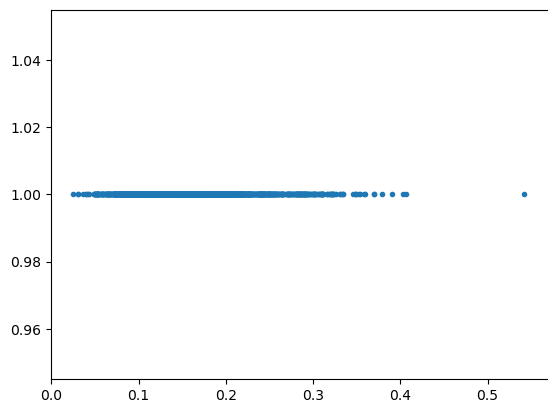

mean_ap2arpc3sep arpc3_intensity_dnm2_peak
             n      r           CI95%     r2  adj_r2  p-val  power
spearman  1605 -0.166  [-0.21, -0.12]  0.028   0.026    0.0    1.0


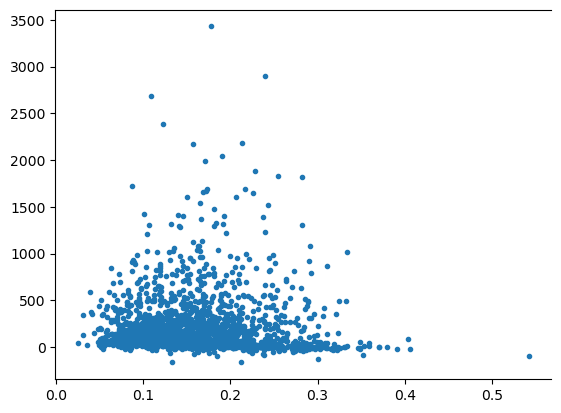

mean_ap2arpc3sep mean_ap2arpc3sep
             n    r       CI95%   r2  adj_r2  p-val  power
spearman  1605  1.0  [1.0, 1.0]  1.0     1.0    0.0    1.0


divide by zero encountered in arctanh
divide by zero encountered in arctanh


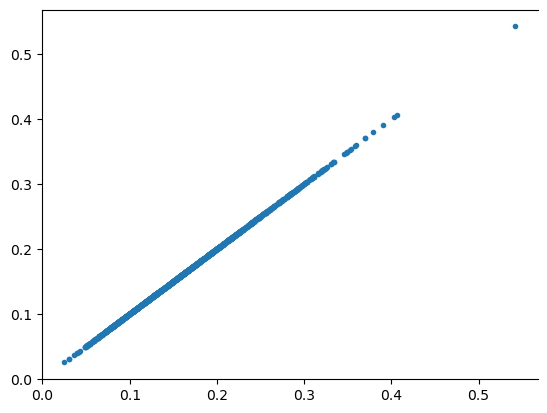

mean_ap2arpc3sep cluster
             n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  1605 NaN    NaN NaN     NaN    NaN   NaN    NaN


An input array is constant; the correlation coefficent is not defined.


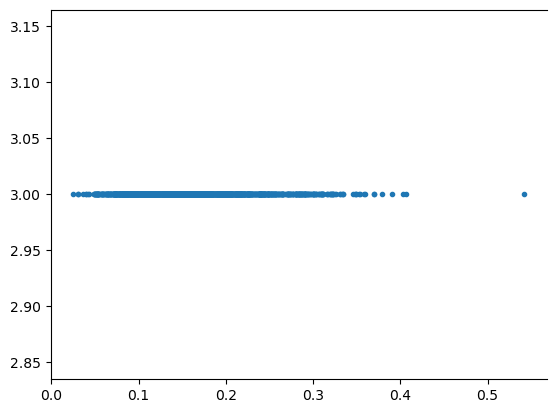








cluster number 5






mean_ap2arpc3sep lifetime
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.147  [-0.21, -0.08]  0.022   0.019    0.0  0.986


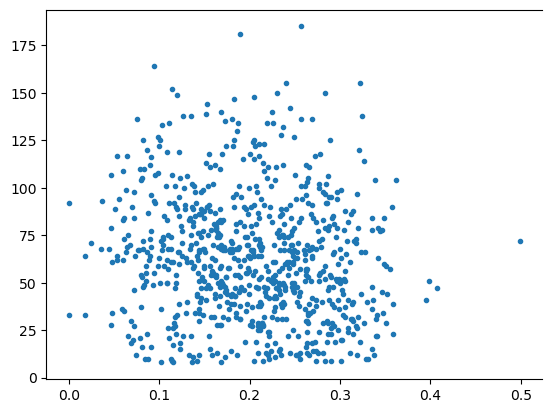

mean_ap2arpc3sep max_arpc3_intensity
            n      r        CI95%     r2  adj_r2  p-val  power
spearman  791  0.136  [0.07, 0.2]  0.019   0.016    0.0   0.97


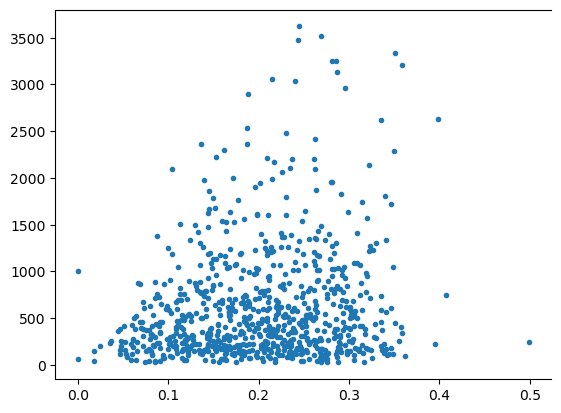

mean_ap2arpc3sep max_dnm2_intensity
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.248  [-0.31, -0.18]  0.062   0.059    0.0    1.0


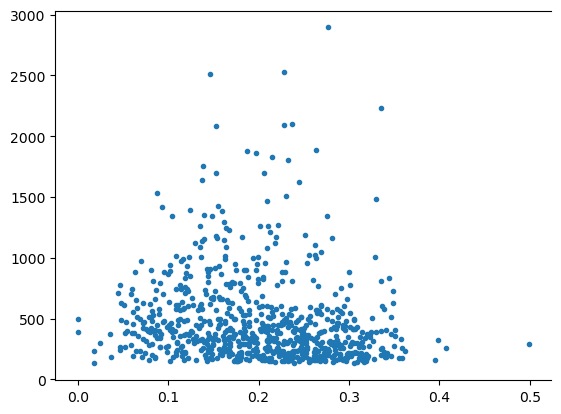

mean_ap2arpc3sep max_ap2_intensity
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.187  [-0.25, -0.12]  0.035   0.032    0.0    1.0


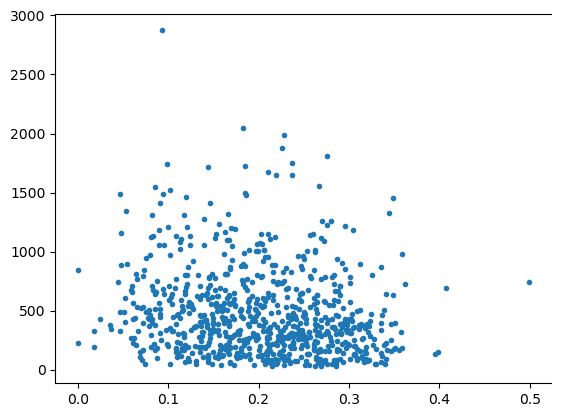

mean_ap2arpc3sep number_arpc3_significant
            n    r           CI95%    r2  adj_r2  p-val  power
spearman  791 -0.3  [-0.36, -0.24]  0.09   0.088    0.0    1.0


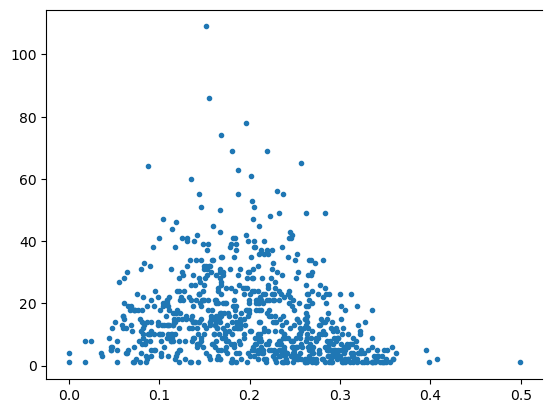

mean_ap2arpc3sep max_consecutive_arpc3_significant
            n     r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.41  [-0.47, -0.35]  0.168   0.166    0.0    1.0


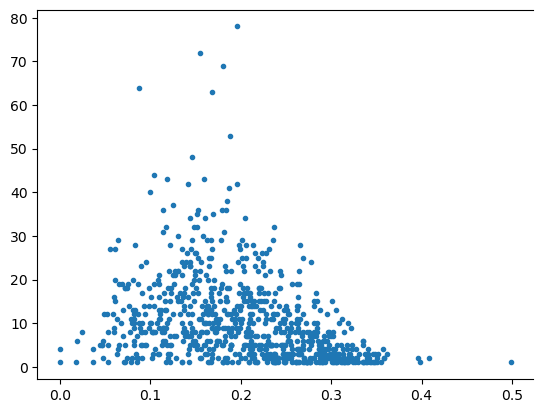

mean_ap2arpc3sep fraction_arpc3_significant
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.222  [-0.29, -0.15]  0.049   0.047    0.0    1.0


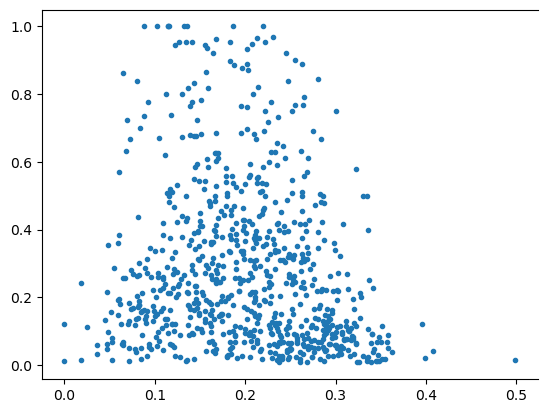

mean_ap2arpc3sep fraction_arpc3_peak
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  791 -0.065  [-0.13, 0.0]  0.004   0.002  0.066  0.452


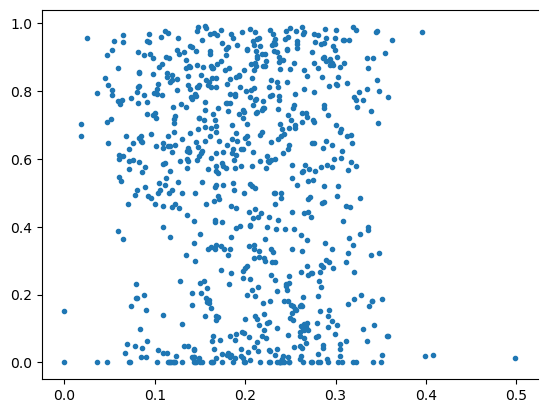

mean_ap2arpc3sep fraction_dnm2_peak
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.121  [-0.19, -0.05]  0.015   0.012  0.001  0.925


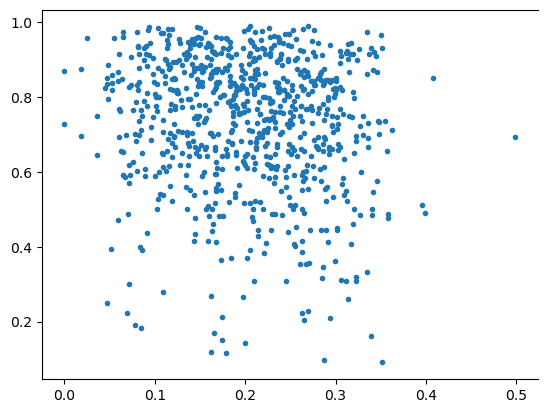

mean_ap2arpc3sep num_arpc3_PSF
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.222  [-0.29, -0.15]  0.049   0.047    0.0    1.0


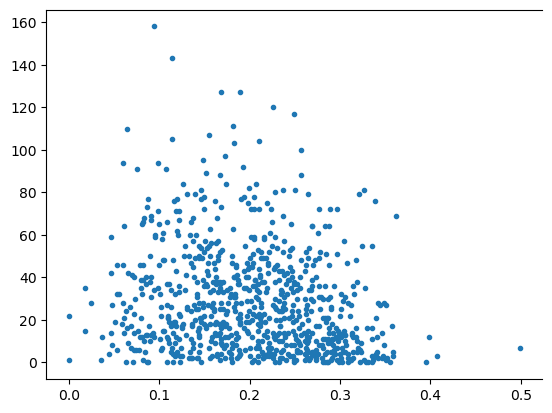

mean_ap2arpc3sep max_consecutive_arpc3_PSF
            n      r          CI95%     r2  adj_r2  p-val  power
spearman  791 -0.263  [-0.33, -0.2]  0.069   0.067    0.0    1.0


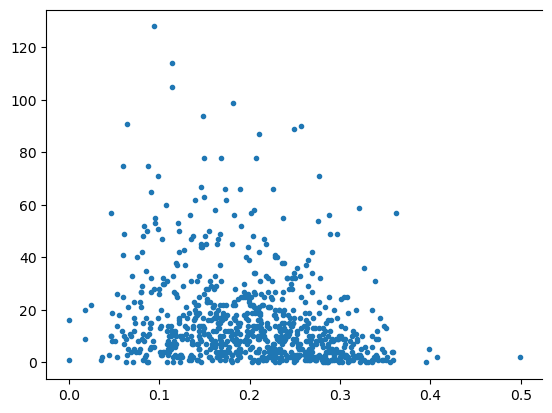

mean_ap2arpc3sep fraction_arpc3_PSF
            n     r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.22  [-0.29, -0.15]  0.048   0.046    0.0    1.0


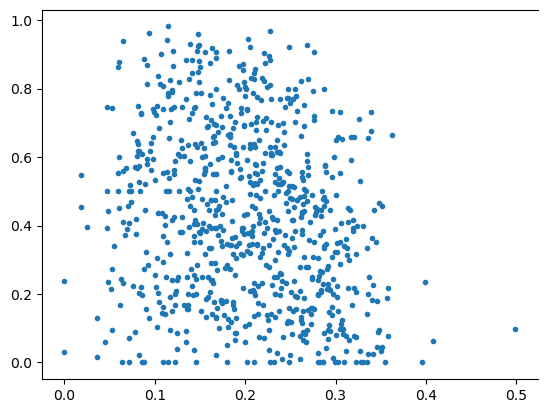

mean_ap2arpc3sep num_arpc3_non_PSF
            n     r         CI95%     r2  adj_r2  p-val  power
spearman  791  0.03  [-0.04, 0.1]  0.001  -0.002  0.404  0.133


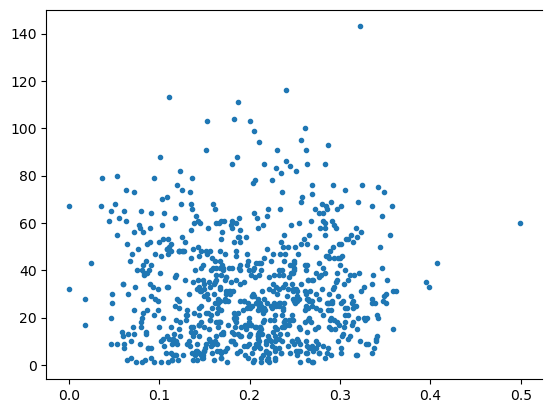

mean_ap2arpc3sep max_consecutive_arpc3_non_PSF
            n      r          CI95%   r2  adj_r2  p-val  power
spearman  791  0.022  [-0.05, 0.09]  0.0  -0.002   0.54  0.094


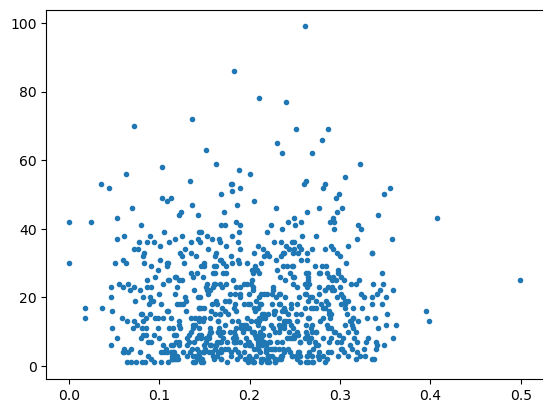

mean_ap2arpc3sep fraction_arpc3_non_PSF
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  791  0.185  [0.12, 0.25]  0.034   0.032    0.0    1.0


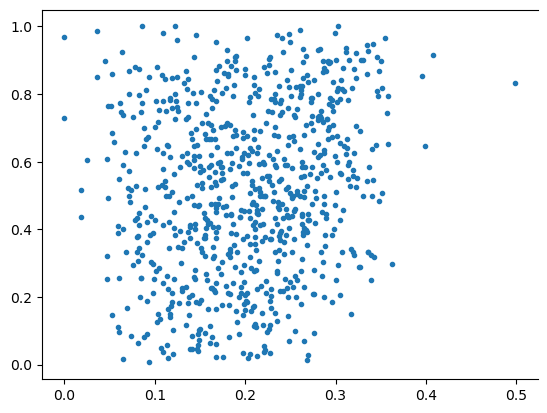

mean_ap2arpc3sep peak_time_difference_dnm2_arpc3
            n      r          CI95%   r2  adj_r2  p-val  power
spearman  791 -0.011  [-0.08, 0.06]  0.0  -0.002  0.755  0.061


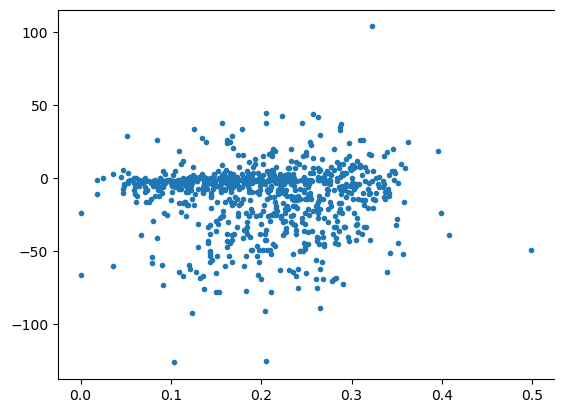

mean_ap2arpc3sep arpc3_psf_status_dnm2_peak
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  791 NaN    NaN NaN     NaN    NaN   NaN    NaN


An input array is constant; the correlation coefficent is not defined.


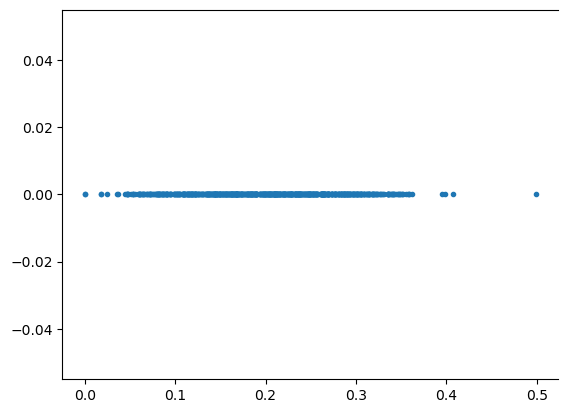

mean_ap2arpc3sep arpc3_intensity_dnm2_peak
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.313  [-0.37, -0.25]  0.098   0.095    0.0    1.0


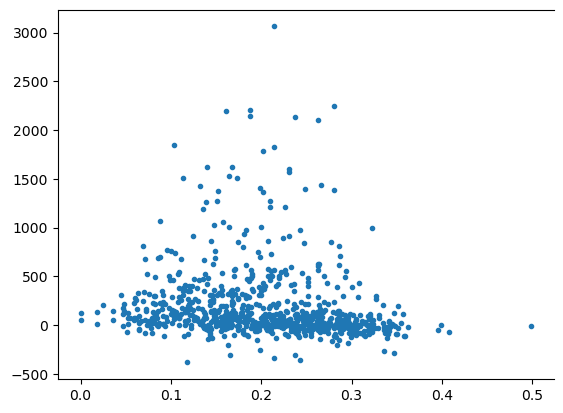

mean_ap2arpc3sep mean_ap2arpc3sep
            n    r       CI95%   r2  adj_r2  p-val  power
spearman  791  1.0  [1.0, 1.0]  1.0     1.0    0.0    1.0


divide by zero encountered in arctanh
divide by zero encountered in arctanh


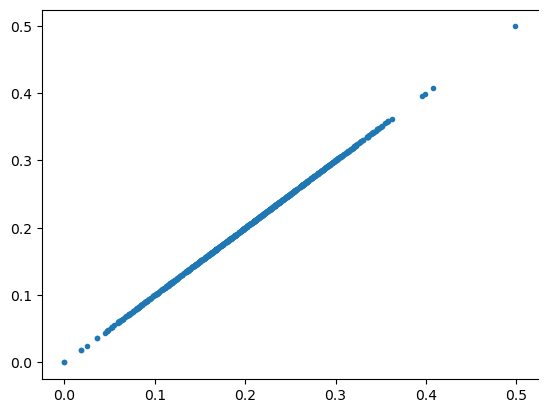

mean_ap2arpc3sep cluster
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  791 NaN    NaN NaN     NaN    NaN   NaN    NaN


An input array is constant; the correlation coefficent is not defined.


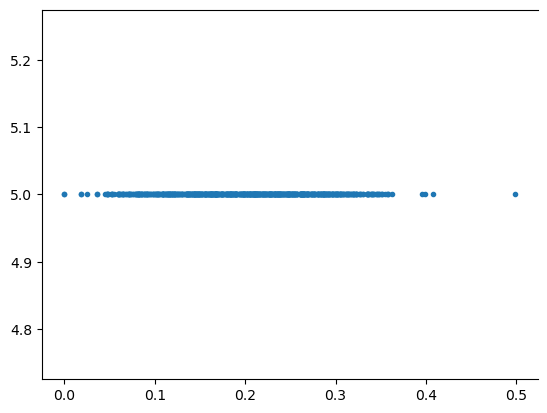

In [224]:
for pca_cluster in arpc3_positive_clusters:
    print('\n\n\n\n\n\n\ncluster number {}'.format(pca_cluster)+'\n\n\n\n\n\n')
    cluster_indices = np.where(labels_pca==pca_cluster)[0]
    df_cluster = df_arpc3_features_clustering.iloc[cluster_indices]
    x1 = StandardScaler().fit_transform(df_cluster['mean_ap2arpc3sep'].values.reshape(-1,1)).flatten()
#     x2 = StandardScaler().fit_transform(df_cluster['ap2arpc3sep_dnm2_peak'].values.reshape(-1,1)).flatten()
    for col in df_cluster.columns:
        print('mean_ap2arpc3sep', col)
        print(pg.corr(x1, StandardScaler().fit_transform(df_cluster[col].values.reshape(-1,1)).flatten(), method="spearman").round(3))
        plt.plot(df_cluster['mean_ap2arpc3sep'].values.reshape(-1,1), df_cluster[col].values.reshape(-1,1), '.')
        plt.show()
#         print('ap2arpc3sep_dnm2_peak', col)
#         print(pg.corr(x2, StandardScaler().fit_transform(df_cluster[col].values.reshape(-1,1)).flatten(), method="spearman").round(3))
        

In [225]:
for pca_cluster in arpc3_positive_clusters:
    print('\n\n\n\n\n\n\ncluster number {}'.format(pca_cluster)+'\n\n\n\n\n\n')
    cluster_indices = np.where(labels_pca==pca_cluster)[0]
    df_cluster = df_features_arpc3_and_featureextraction.iloc[cluster_indices]
    x1 = StandardScaler().fit_transform(df_cluster['mean_ap2arpc3sep'].values.reshape(-1,1)).flatten()
#     x2 = StandardScaler().fit_transform(df_cluster['ap2arpc3sep_dnm2_peak'].values.reshape(-1,1)).flatten()
#     print(len(x1))
#     b
    for i in range(df_cluster.values.shape[1]):
        col = df_features_arpc3_and_featureextraction.columns[i]

        print('mean_ap2arpc3sep', col)
#         print(len(StandardScaler().fit_transform(df_cluster[col].values.reshape(-1,1)).flatten()))
        print(pg.corr(x1, StandardScaler().fit_transform(df_cluster.values[:,i].reshape(-1,1)).flatten(), method="spearman").round(3))
#         print('ap2arpc3sep_dnm2_peak', col)
#         print(pg.corr(x2, StandardScaler().fit_transform(df_cluster.values[:,i].reshape(-1,1)).flatten(), method="spearman").round(3))








cluster number 2






mean_ap2arpc3sep lifetime
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.226  [-0.31, -0.14]  0.051   0.048    0.0    1.0
mean_ap2arpc3sep max_arpc3_intensity
            n     r          CI95%     r2  adj_r2  p-val  power
spearman  531 -0.18  [-0.26, -0.1]  0.032   0.029    0.0  0.987
mean_ap2arpc3sep max_dnm2_intensity
            n      r           CI95%    r2  adj_r2  p-val  power
spearman  531 -0.173  [-0.25, -0.09]  0.03   0.026    0.0  0.981
mean_ap2arpc3sep max_ap2_intensity
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.134  [-0.22, -0.05]  0.018   0.014  0.002  0.874
mean_ap2arpc3sep number_arpc3_significant
            n      r          CI95%     r2  adj_r2  p-val  power
spearman  531 -0.277  [-0.35, -0.2]  0.077   0.073    0.0    1.0
mean_ap2arpc3sep max_consecutive_arpc3_significant
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.383  [-0

An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.



mean_ap2arpc3sep peak_time_difference_dnm2_arpc3
            n      r         CI95%   r2  adj_r2  p-val  power
spearman  531 -0.016  [-0.1, 0.07]  0.0  -0.004  0.709  0.066
mean_ap2arpc3sep arpc3_psf_status_dnm2_peak
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  531 NaN    NaN NaN     NaN    NaN   NaN    NaN
mean_ap2arpc3sep arpc3_intensity_dnm2_peak
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.305  [-0.38, -0.23]  0.093   0.089    0.0    1.0
mean_ap2arpc3sep mean_ap2arpc3sep
            n    r       CI95%   r2  adj_r2  p-val  power
spearman  531  1.0  [1.0, 1.0]  1.0     1.0    0.0    1.0
mean_ap2arpc3sep cluster
            n   r  CI95%  r2  adj_r2  p-val  BF10  power
spearman  531 NaN    NaN NaN     NaN    NaN   NaN    NaN
mean_ap2arpc3sep lifetime
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  531 -0.226  [-0.31, -0.14]  0.051   0.048    0.0    1.0
mean_ap2arpc3sep max_int_ch0
            n    

An input array is constant; the correlation coefficent is not defined.
An input array is constant; the correlation coefficent is not defined.


            n      r          CI95%     r2  adj_r2  p-val  power
spearman  531 -0.046  [-0.13, 0.04]  0.002  -0.002  0.287  0.187
mean_ap2arpc3sep avg_int_change_to_peak_ch1
            n      r         CI95%    r2  adj_r2  p-val  power
spearman  531  0.101  [0.02, 0.18]  0.01   0.006   0.02  0.646
mean_ap2arpc3sep avg_int_change_after_peak_ch0
            n      r          CI95%     r2  adj_r2  p-val  power
spearman  531  0.025  [-0.06, 0.11]  0.001  -0.003  0.559   0.09
mean_ap2arpc3sep avg_int_change_after_peak_ch1
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  531  0.132  [0.05, 0.21]  0.017   0.014  0.002  0.861
mean_ap2arpc3sep peak_int_diff_ch0_ch1
            n      r          CI95%     r2  adj_r2  p-val  power
spearman  531 -0.041  [-0.13, 0.04]  0.002  -0.002  0.342  0.158
mean_ap2arpc3sep ratio_max_int_ch0_ch1
            n     r          CI95%   r2  adj_r2  p-val  power
spearman  531 -0.02  [-0.11, 0.06]  0.0  -0.003  0.638  0.076
mean_ap2arpc3sep

An input array is constant; the correlation coefficent is not defined.
divide by zero encountered in arctanh
divide by zero encountered in arctanh


             n      r         CI95%     r2  adj_r2  p-val  power
spearman  1605  0.171  [0.12, 0.22]  0.029   0.028    0.0    1.0
mean_ap2arpc3sep kurtosis_ch1
             n      r          CI95%     r2  adj_r2  p-val  power
spearman  1605 -0.146  [-0.19, -0.1]  0.021    0.02    0.0    1.0
mean_ap2arpc3sep number_significant_ch1
             n     r           CI95%     r2  adj_r2  p-val  power
spearman  1605 -0.08  [-0.13, -0.03]  0.006   0.005  0.001  0.894
mean_ap2arpc3sep max_consecutive_significant_ch1
             n      r           CI95%     r2  adj_r2  p-val  power
spearman  1605 -0.086  [-0.13, -0.04]  0.007   0.006  0.001  0.931
mean_ap2arpc3sep fraction_significant_ch1
             n      r         CI95%     r2  adj_r2  p-val  power
spearman  1605  0.092  [0.04, 0.14]  0.008   0.007    0.0  0.959
mean_ap2arpc3sep fraction_peak_ch0
             n      r          CI95%   r2  adj_r2  p-val  power
spearman  1605 -0.002  [-0.05, 0.05]  0.0  -0.001  0.925  0.051
mean_ap2arpc3sep f

An input array is constant; the correlation coefficent is not defined.
divide by zero encountered in arctanh
divide by zero encountered in arctanh
An input array is constant; the correlation coefficent is not defined.



mean_ap2arpc3sep variation_ch1
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.158  [-0.22, -0.09]  0.025   0.022    0.0  0.994
mean_ap2arpc3sep skewness_ch0
            n      r          CI95%     r2  adj_r2  p-val  power
spearman  791  0.064  [-0.01, 0.13]  0.004   0.002  0.073  0.435
mean_ap2arpc3sep skewness_ch1
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.186  [-0.25, -0.12]  0.035   0.032    0.0    1.0
mean_ap2arpc3sep kurtosis_ch0
            n      r         CI95%     r2  adj_r2  p-val  power
spearman  791  0.125  [0.06, 0.19]  0.016   0.013    0.0  0.942
mean_ap2arpc3sep kurtosis_ch1
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.148  [-0.22, -0.08]  0.022    0.02    0.0  0.987
mean_ap2arpc3sep number_significant_ch1
            n      r           CI95%     r2  adj_r2  p-val  power
spearman  791 -0.081  [-0.15, -0.01]  0.007   0.004  0.022   0.63
mean_ap2arpc3sep max_c

# comparing all events_kept in clusters 1 4 5

In [226]:
events_kept_features = df_merged_features_simultaneous3colortrackingarpc3.values[dnm2_pos_indices[ccp_indices]][:,:]

In [227]:
values_df_sep_extracted_features = np.concatenate((events_kept_features, df_arpc3_features_clustering['mean_ap2arpc3sep'].values.reshape(-1,1)), axis=1)

In [228]:
df_values_df_sep_extracted_features = pd.DataFrame(data=values_df_sep_extracted_features, columns=list(possible_track_features)+['mean_sep'])

In [229]:
df_values_df_sep_extracted_features

lifetime  max_int_ch0  max_int_ch1  dist_traveled_ch0  \
0        155.0   373.246072   376.087420          30.243446   
1        150.0   538.940307   630.195936          22.785441   
2        148.0   762.536655   307.453204          28.640664   
3        145.0  1734.100653   640.274767          15.078223   
4        142.0   597.504350   242.146198           5.904132   
...        ...          ...          ...                ...   
3288      12.0    37.769415  1188.853848           7.014920   
3289      11.0    98.159514   210.297223           4.809207   
3290      11.0   225.924512   136.556719          12.301866   
3291       9.0   102.878490   300.120988           0.301480   
3292       9.0    18.947458   183.634490           2.083477   

      dist_traveled_ch1  max_dist_between_ch0_ch1    md_ch0    md_ch1  \
0             28.566441                  4.965625  0.498531  0.865115   
1             18.180376                  5.460893  0.495116  0.766039   
2             27.795035                  5.360468  1.010528  1.317606   
3             16.576873                  2.777929  0.604842  0.952289   
4              2.559480                  5.006920  0.817319  1.177486   
...                 ...                       ...       ...       ...   
3288           1.356849                  5.488752  1.640620  0.982467   
3289           4.794405                  3.716861  1.282537  0.623414   
3290          13.654936                  3.097282  1.420976  1.325549   
3291           1.056575                  1.988481  0.569461  0.373973   
3292           2.162665                  3.272705  2.240998  0.473608   

      time_to_peak_ch0  time_to_peak_ch1  ...  skewness_ch0  skewness_ch1  \
0                134.0             158.0  ...      0.018561      2.762026   
1                 90.0             101.0  ...      0.517207      3.098084   
2                106.0             103.0  ...      0.711312      1.181582   
3                106.0             119.0  ...      0.736250      2.624609   
4                 86.0              89.0  ...      1.044103      1.809952   
...                ...               ...  ...           ...           ...   
3288              15.0              11.0  ...      0.274260      0.531319   
3289               8.0              20.0  ...     -0.801173     -0.156773   
3290               5.0              10.0  ...      1.558376      0.766345   
3291              12.0              18.0  ...      0.096897      0.579833   
3292               7.0              12.0  ...     -0.945598      0.680066   

      kurtosis_ch0  kurtosis_ch1  number_significant_ch1  \
0        -0.947908     10.854667                    40.0   
1        -1.208292     10.861171                   114.0   
2        -0.709773      0.548802                    89.0   
3        -0.850355      8.173540                    89.0   
4        -0.095099      4.227708                    65.0   
...            ...           ...                     ...   
3288     -1.048763     -0.988310                    13.0   
3289     -0.712558     -1.393178                    13.0   
3290      1.941445     -1.141623                     8.0   
3291     -0.071600     -0.176317                    17.0   
3292      0.003322     -0.496302                    19.0   

      max_consecutive_significant_ch1  fraction_significant_ch1  \
0                                12.0                  0.242424   
1                                38.0                  0.712500   
2                                56.0                  0.563291   
3                                61.0                  0.574194   
4                                43.0                  0.427632   
...                               ...                       ...   
3288                              7.0                  0.590909   
3289                             12.0                  0.619048   
3290                              8.0                  0.380952   
3291                             12.0                  0

In [230]:
# cluster_indices = np.where((labels_pca==2) | (labels_pca==3) | (labels_pca==5))[0]
# #     print(cluster_indices)
# values_df_cluster = StandardScaler().fit_transform(df_values_df_sep_extracted_features.iloc[cluster_indices].values)
# df_scaled = pd.DataFrame(data=values_df_cluster, columns=list(possible_track_features)+['mean_sep'])

# print(pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep"], None]).round(3))

In [231]:
# cluster_indices = np.where((labels_pca==3) | (labels_pca==5))[0]
# #     print(cluster_indices)
# values_df_cluster = StandardScaler().fit_transform(df_values_df_sep_extracted_features.iloc[cluster_indices].values)
# df_scaled = pd.DataFrame(data=values_df_cluster, columns=list(possible_track_features)+['mean_sep'])

# print(pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep"], None]).round(3))

In [197]:
# cluster_indices = np.where((labels_pca==2))[0]
# values_df_cluster = StandardScaler().fit_transform(df_values_df_sep_extracted_features.iloc[cluster_indices].values)
# df_scaled = pd.DataFrame(data=values_df_cluster, columns=list(possible_track_features)+['mean_sep'])

# print(pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep"], None]).round(3))

In [198]:
# pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep"], None]).round(3)

In [292]:
pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep"], None])['r'].round(3)

0    -0.886
1    -0.886
2    -0.257
3     0.086
4    -0.143
5    -0.029
6     0.371
7     0.143
8    -0.928
9    -0.943
10   -0.086
11    0.000
12    0.143
13   -0.429
14    0.600
15    0.486
16   -0.086
17   -0.600
18   -0.714
19   -0.771
20    0.600
21    0.600
22   -0.143
23   -0.600
24   -0.429
25   -0.143
26   -0.371
27   -0.986
28   -0.771
29   -0.086
30   -0.714
31   -0.543
Name: r, dtype: float64

In [306]:
correlation_matrix = []
labels_clusters = []
for cluster in set(labels_pca):
    print(cluster)
    labels_clusters.append(cluster)
    cluster_indices = np.where((labels_pca==cluster))[0]
#     print(cluster_indices)
    values_df_cluster = StandardScaler().fit_transform(df_values_df_sep_extracted_features.iloc[cluster_indices].values)
    df_scaled = pd.DataFrame(data=values_df_cluster, columns=list(possible_track_features)+['mean_sep'])
#     print(df_scaled['mean_sep'])
    corr = pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep"], None])['r'].round(3)
    non_sig = np.where(pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep"], None])['p-unc'] > 0.01)[0]
    corr[non_sig] = 0
    correlation_matrix.append(corr)
correlation_matrix = np.array(correlation_matrix).T

0
1
2
3
4
5
-1


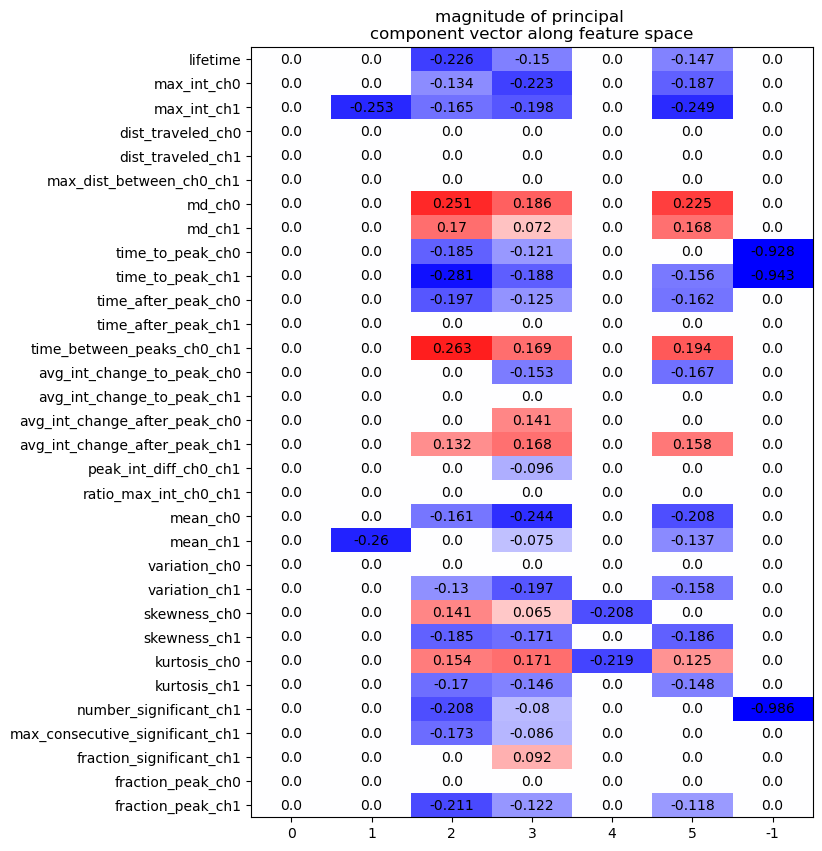

In [307]:
# %%capture

plt.style.use('default')
plt.rcParams['figure.figsize']=(3,2)
plt.rcParams['figure.dpi']=100
fig, ax = plt.subplots(1,1, constrained_layout=False, figsize=(10,10))
columns=list(possible_track_features)
vmin = -0.3
vmax = 0.3
norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0)
cmap = 'bwr'

array_plot = correlation_matrix
im = ax.imshow(array_plot,
                interpolation='none', aspect=0.3, origin='upper', cmap=cmap, norm=norm)
# Major ticks
ax.set_xticks(np.arange(0, array_plot.shape[1], 1))
ax.set_yticks(np.arange(0, len(columns), 1))

# Labels for major ticks
ax.set_xticklabels(labels_clusters)

ax.set_yticklabels(columns)



ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

for (j,i),label in np.ndenumerate(array_plot):
    ax.text(i,j,str(np.around(label,3)),ha='center',va='center')

plt.title('magnitude of principal \ncomponent vector along feature space')
plt.tight_layout
plt.show()

In [315]:
correlation_matrix = []
labels_clusters = []
for cluster in [2,3,5]:
    print(cluster)
    labels_clusters.append(cluster)
    cluster_indices = np.where((labels_pca==cluster))[0]
#     print(cluster_indices)
    values_df_cluster = StandardScaler().fit_transform(df_values_df_sep_extracted_features.iloc[cluster_indices].values)
    df_scaled = pd.DataFrame(data=values_df_cluster, columns=list(possible_track_features)+['mean_sep'])
#     print(df_scaled['mean_sep'])
    corr = pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep"], None])['r'].round(3)
    non_sig = np.where(pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep"], None])['p-unc'] > 0.001)[0]
    corr[non_sig] = 0
    correlation_matrix.append(corr)
correlation_matrix = np.array(correlation_matrix).T

2
3
5


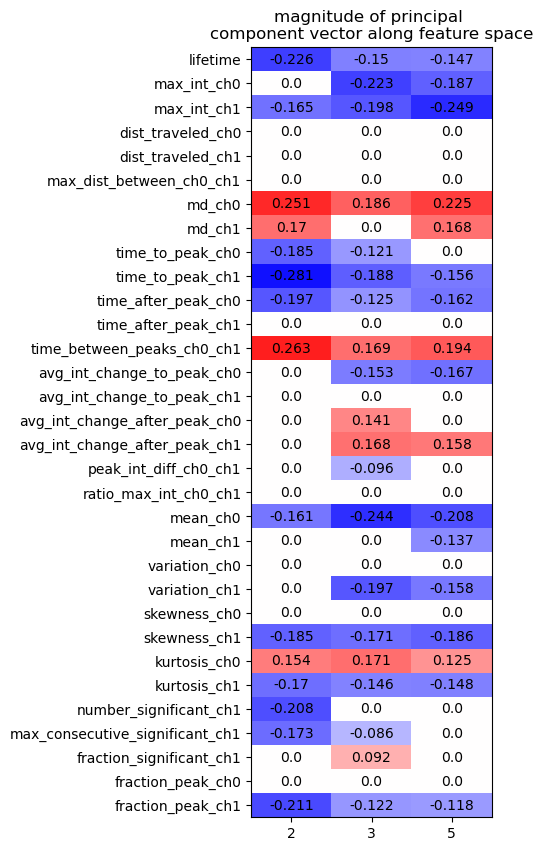

In [316]:
# %%capture

plt.style.use('default')
plt.rcParams['figure.figsize']=(3,2)
plt.rcParams['figure.dpi']=100
fig, ax = plt.subplots(1,1, constrained_layout=False, figsize=(10,10))
columns=list(possible_track_features)
vmin = -0.3
vmax = 0.3
norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0)
cmap = 'bwr'

array_plot = correlation_matrix
im = ax.imshow(array_plot,
                interpolation='none', aspect=0.3, origin='upper', cmap=cmap, norm=norm)
# Major ticks
# Major ticks
ax.set_xticks(np.arange(0, array_plot.shape[1], 1))
ax.set_yticks(np.arange(0, len(columns), 1))

# Labels for major ticks
ax.set_xticklabels(labels_clusters)
ax.set_yticklabels(columns)



ax.grid(which='minor', color='w', linestyle='-', linewidth=1)

for (j,i),label in np.ndenumerate(array_plot):
    ax.text(i,j,str(np.around(label,3)),ha='center',va='center')

plt.title('magnitude of principal \ncomponent vector along feature space')
plt.tight_layout
plt.show()

# comparing all events_kept, not split into pca clusters

In [67]:
values_df_cluster = StandardScaler().fit_transform(df_values_df_sep_extracted_features.values)
df_scaled = pd.DataFrame(data=values_df_cluster, columns=list(possible_track_features)+['mean_sep', 'sep_peak'])

print(pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep", "sep_peak"], None]).round(3))

           X                                Y    method       tail     n  \
0   mean_sep                         lifetime  spearman  two-sided  3293   
1   mean_sep                      max_int_ch0  spearman  two-sided  3293   
2   mean_sep                      max_int_ch1  spearman  two-sided  3293   
3   mean_sep                dist_traveled_ch0  spearman  two-sided  3293   
4   mean_sep                dist_traveled_ch1  spearman  two-sided  3293   
..       ...                              ...       ...        ...   ...   
59  sep_peak           number_significant_ch1  spearman  two-sided  3293   
60  sep_peak  max_consecutive_significant_ch1  spearman  two-sided  3293   
61  sep_peak         fraction_significant_ch1  spearman  two-sided  3293   
62  sep_peak                fraction_peak_ch0  spearman  two-sided  3293   
63  sep_peak                fraction_peak_ch1  spearman  two-sided  3293   

        r           CI95%     r2  adj_r2      z  p-unc  power  
0  -0.016   [-0.05, 0.0

# look at all DNM2+ events

In [68]:
df_dnm2_pos_features = extracted_features_all_tracks_3_color[np.nonzero(gmm_predictions_new_data==index_DNM2positive)[0]]

dnm2pos_meanap2arpc3sep = []
dnm2pos_ap2arpc3sepdnm2peak = []
dnm2pos_events = np.array(list(merged_all_valid_tracks))[np.nonzero(gmm_predictions_new_data==index_DNM2positive)[0]]

for i in range(len(dnm2pos_events)):

    ch0_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(dnm2pos_events, i, 0) # positions of ap2 and dnm2
    ch0_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(dnm2pos_events, i, 0)
    ch1_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(dnm2pos_events, i, 1)
    ch1_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(dnm2pos_events, i, 1)
    ch2_x = return_track_attributes.return_puncta_x_position_no_buffer_one_channel(dnm2pos_events, i, 2)
    ch2_y = return_track_attributes.return_puncta_y_position_no_buffer_one_channel(dnm2pos_events, i, 2)
    ap2dnm2sep = np.sqrt((0.108*(ch0_x-ch1_x))**2 + (0.108*(ch0_y-ch1_y))**2)
    ap2arpc3sep = np.sqrt((0.108*(ch0_x-ch2_x))**2 + (0.108*(ch0_y-ch2_y))**2)

    dnm2pos_meanap2arpc3sep.append(np.nanmean(ap2arpc3sep))
    dnm2pos_ap2arpc3sepdnm2peak.append(ap2arpc3sep[np.nanargmax(return_track_attributes.return_track_amplitude_no_buffer_channel(dnm2pos_events, i, 1))])
    
    

df_dnm2_pos_features = np.concatenate((df_dnm2_pos_features, np.array(dnm2pos_meanap2arpc3sep).reshape(-1,1), np.array(dnm2pos_ap2arpc3sepdnm2peak).reshape(-1,1)), axis=1)
df_dnm2_pos_features = pd.DataFrame(data=df_dnm2_pos_features, columns=list(possible_track_features)+['mean_sep', 'sep_peak'])

values_df_cluster = StandardScaler().fit_transform(df_dnm2_pos_features.values)
df_scaled = pd.DataFrame(data=values_df_cluster, columns=list(possible_track_features)+['mean_sep', 'sep_peak'])

print(pg.pairwise_corr(df_scaled, method='spearman', tail='two-sided', columns=[["mean_sep", "sep_peak"], None]).round(3))


           X                                Y    method       tail     n  \
0   mean_sep                         lifetime  spearman  two-sided  7839   
1   mean_sep                      max_int_ch0  spearman  two-sided  7839   
2   mean_sep                      max_int_ch1  spearman  two-sided  7839   
3   mean_sep                dist_traveled_ch0  spearman  two-sided  7839   
4   mean_sep                dist_traveled_ch1  spearman  two-sided  7839   
..       ...                              ...       ...        ...   ...   
59  sep_peak           number_significant_ch1  spearman  two-sided  7839   
60  sep_peak  max_consecutive_significant_ch1  spearman  two-sided  7839   
61  sep_peak         fraction_significant_ch1  spearman  two-sided  7839   
62  sep_peak                fraction_peak_ch0  spearman  two-sided  7839   
63  sep_peak                fraction_peak_ch1  spearman  two-sided  7839   

        r           CI95%     r2  adj_r2      z  p-unc  power  
0  -0.179   [-0.2, -0.1

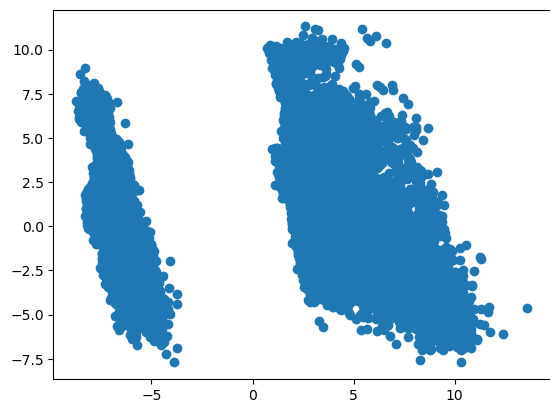

In [69]:
plt.scatter(pcs_new_data[:,0], pcs_new_data[:,1])

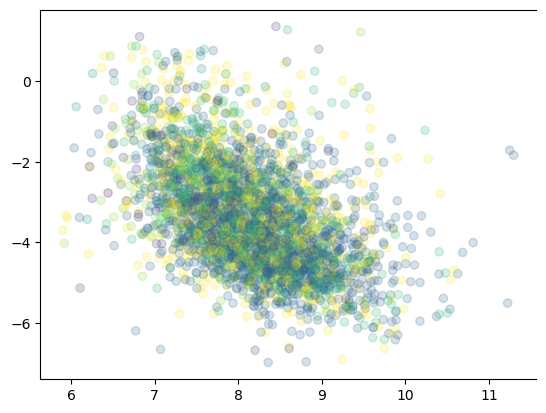

In [70]:
plt.scatter(pcs_new_data[:,0][np.nonzero(gmm_predictions_new_data==index_DNM2positive)[0][np.where(np.array(current_param_outputs)==1)[0]]], 
            pcs_new_data[:,1][np.nonzero(gmm_predictions_new_data==index_DNM2positive)[0][np.where(np.array(current_param_outputs)==1)[0]]],
            c=labels_pca,
            alpha=0.2)
